# Final Project: Data Science Workflow

### The assignment is due on Wednesday, May 13th at 11:59pm PST.

**Collaborators**: Ke Ma; Chrystal Chern; Andrew Yeskoo

## This Assignment
http://www.ds100.org/sp20/resources/assets/final_proj/final_proj_spec.pdf

Chosen dataset: Covid-19

## Notebook Setup

In [1]:
# Import Libraries:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)
import plotly.express as px

import time
from datetime import datetime as datetime
from datetime import date

# disable chained assignments
pd.options.mode.chained_assignment = None 
# disable max_columns assignments
pd.set_option('display.max_columns', None)
# set array print threshold
np.set_printoptions(threshold=300)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [192]:
# Import Datasets:
folder    = 'original_covid19/'
states    = pd.read_csv(folder + '4.18states.csv')
counties  = pd.read_csv(folder + 'abridged_counties.csv')
confirmed = pd.read_csv(folder + 'time_series_covid19_confirmed_US.csv')
deaths    = pd.read_csv(folder + 'time_series_covid19_deaths_US.csv')

# Import Datasets:
folder_updated    = '20200508_covid19/'
states    = pd.read_csv(folder_updated + 'states.csv')
counties  = pd.read_csv(folder_updated + 'abridged_counties.csv')
confirmed = pd.read_csv(folder_updated + 'time_series_covid19_confirmed_US.csv')
deaths    = pd.read_csv(folder_updated + 'time_series_covid19_deaths_US.csv')

In [3]:
# Display first few rows of each dataset:
display(states.head())
#print(states.columns)
display(counties.head())
#print(counties.columns)
display(confirmed.head())
#print(confirmed.columns)
display(deaths.head())
#print(deaths.columns)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-18 22:32:47,32.3182,-86.9023,4712,153,NaN,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,Alaska,US,2020-04-18 22:32:47,61.3707,-152.4044,314,9,147.0,305.0,2.0,52.530410,9655.0,39.0,2.866242,84000002,USA,1615.226458,12.420382
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-04-18 22:32:47,33.7298,-111.4312,4724,180,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004,USA,701.291175,11.981372
4,Arkansas,US,2020-04-18 22:32:47,34.9697,-92.3731,1744,38,703.0,1706.0,5.0,67.361213,24141.0,291.0,2.178899,84000005,USA,932.435235,16.685780


,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,South,East South Central,2.0,55601.0,27007.0,28497.0,0.486578,8392.0,91.8,54571.0,37.0,11439.0,8046.0,16.0,9.9,204.5,56.1,18.081557,81.79,324.0,50.0,0.0,1.0,6.0,0.326656,1866.0,1713.0,2001.0,1990.0,2171.0,2119.0,2213.0,2077.0,1539.0,1541.0,1543.0,1614.0,1594.0,1736.0,3978.0,4265.0,4040.0,4165.0,1524.0,1559.0,1279.0,1498.0,1821.0,2192.0,841.0,1141.0,159.0,392.0,NaN,NaN,NaN,NaN,10.0,20.0,44.0,73.0,112.0,143.0,109.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,South,East South Central,3.0,218022.0,103225.0,109403.0,0.485472,42413.0,114.7,182265.0,41.1,54145.0,41590.0,33.0,8.5,183.2,41.9,17.489033,54.28,2101.0,536.0,0.0,3.0,51.0,0.253255,5614.0,5544.0,5832.0,5767.0,6076.0,5850.0,5930.0,5670.0,4793.0,4656.0,5183.0,5064.0,5317.0,5392.0,11620.0,11933.0,13047.0,13874.0,5943.0,6580.0,5728.0,6284.0,8558.0,9245.0,4379.0,5153.0,1176.0,2057.0,13.0,NaN,NaN,23.0,30.0,52.0,125.0,262.0,434.0,546.0,597.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,South,East South Central,6.0,24881.0,13335.0,11935.0,0.527701,4757.0,31.0,27457.0,39.0,6681.0,4706.0,NaN,15.7,220.4,49.0,21.999985,69.82,181.0,12.0,0.0,1.0,5.0,0.893106,847.0,855.0,826.0,816.0,820.0,779.0,919.0,812.0,1048.0,746.0,1212.0,798.0,1162.0,646.0,2115.0,1513.0,2164.0,1854.0,910.0,907.0,859.0,940.0,1067.0,1171.0,498.0,730.0,129.0,314.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,44.0,65.0,72.0,68.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,South,East South Central,1.0,22400.0,12138.0,10530.0,0.535469,3632.0,36.8,22915.0,37.8,5128.0,3389.0,NaN,13.3,225.5,57.2,19.114200,84.49,145.0,16.0,0.0,1.0,0.0,0.278124,712.0,666.0,759.0,646.0,771.0,669.0,806.0,737.0,811.0,680.0,987.0,616.0,1013.0,633.0,1895.0,1487.0,1883.0,1503.0,734.0,667.0,684.0,650.0,803.0,920.0,370.0,534.0,73.0,206.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,37.0,62.0,56.0,45.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,1498

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,5,12,14,15,27,29,32,37,45,51,55,56,58,69,77,82,84,93,112,113,121,121,128,130,133,133,133,133,135,135,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,6,8,8,8,8,8,11,11,11,11,11,11,11,13,13,13,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,14,21,23,31,39,51,64,79,100,127,174,239,286,316,316,452,475,513,573,620,683,725,788,897,903,923,974,1043,1068,1118
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,6,6,7,17,17,17,19,22,23,30,30,30,30,37,40,42,43,43,45,45,50,51,51,51,51,51,51,51,53


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",55641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",164229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",55144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",2933408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,2,3,3,3,6,8,11,12,15,18,20,21,23,24,33,39,42,44,45,45,51,56,58,60
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",107268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,3


## Question Framing

### Factors vs. Severity

We would like to explore what **factors** are good predictors for the **severity** of coronavirus spread within the **contiguous United States**.

1. We sort these **factors** into two groups:


- *static* (i.e., factors which are relatively time-independent or inherent in a region, such as geographical location, health insurance coverage, and demographic conditions like level of urbanization and major party affiliation)
- *dynamic* (i.e., time-dependent interventions taken by a region to reduce the spread of disease, such as stay-at-home orders, limits on social gatherings, and school and restaurant closures)
> - *stay-at-home*: We are particularly interested in the intervention of stay-at-home orders which regions throughout the United States adopted.  This intervention has been one of the most controversial in the U.S., and there are many U.S. inhabitants in strong support or strong protest of the stay-at-home order.  Thus, although this factor is already one of the dynamic factors, we would also like to see its individual effect on severity of coronavirus spread.




2. We sort the measure of **severity** into three groups:


- *confirmed case intensity* (i.e., confirmed cases as a proportion of population during a snapshot in time)
- *death intensity* (i.e., deaths as a proportion of population during a snapshot in time)
- *rate of spread* (i.e., increase in confirmed case intensity over time).  The time periods over which rate of spread can be measured include the following:
> - total: the first day of confirmed cases in a region to the last day of recorded data
> - before intervention: the first day of confirmed cases in a region to the first day of an intervention in the region
> - since intervention: the first day of an intervention in a region to the last day of recorded data


We note that we are more interested in the *proportion* of cases in a region than total number of cases.  Thus, our measures of severity are *normalized by population*:

$$\text{Confirmed Case Intensity (per 100,000 people)} = \frac{\text{Total Confirmed Cases in a Region}}{\text{Region Population}}\times10^5$$

$$\text{Death Intensity (per 100,000 people)} = \frac{\text{Total Deaths in a Region}}{\text{Region Population}}\times10^5$$

$$\text{Rate of Spread (per 100,000 people)} = \frac{\text{Increase in Confirmed Case Intensity}}{\text{Time (total, before intervention, or since intervention}}$$

### Questions Asked

Our questions are summed up into the following.  The first three questions make use of data up to April 18th, and the fourth question makes use of data up to May 8th.

*With Data up to April 18th*:
1. Are a region's *static* factors correlated with the three measures of severity (*confirmed case intensity*, *death intensity*, and *rate of spread*) in that region?  If so, can we quantify what kinds of static factors are most highly correlated with the three measures of severity and thus infer a static factor's ability to predict severity?
2. Are a region's *dynamic* factors correlated with *rate of spread* in that region?  If so, can we quantify which dynamic factors are most highly correlated with rate of spread and thus infer the relative success or lack thereof of the various interventions?
3. Does the introduction of a *stay-at-home* order, on its own, affect the *rate of spread*?  Can we infer the effectiveness of the stay-at-home order based on the magnitude of the effect?

*With Data up to May 8th*:
4. Can historical trends help inform future trends in severity?  That is, can the best model we come up with to predict severity in Questions 1-3 be used to accurately predict severity between April 18th and May 8th? If so, are static factors or dynamic factors more useful to predict future trends?

## Data Cleaning

### Limit Location to U.S.

To begin the data cleaning process, we start by limiting the data to locations within the United States; that is, the 50 states and District of Columbia.  We notice that the Federal Information Processing Standard (FIPS) state code up to 56 includes these locations.  This number is labeled as `FIPS` in the `states` dataset and `STATEFP` in the `counties` dataset.

In [193]:
# Using only data from 50 States and D.C.
states_51 = states.loc[states["FIPS"]<=56]
counties_51 = counties.loc[counties["STATEFP"]<=56]

### Primary Keys and Null Values

Next, we identify the primary keys of each dataset and set the primary key as the index for each dataset.
1. `states` dataset: `FIPS`, referring to state FIPS code
2. `counties` dataset: `countyFIPS`, referring to county FIPS code
2. `confirmed` dataset: `FIPS`, referring to county FIPS code
3. `deaths` dataset: `FIPS`, referring to county FIPS code

We note that some entries in the `confirmed` and `deaths` datasets have null values for their primary keys, because they are not counties.  We will fill those keys with negative integers -2 and -3.

In [194]:
# Look at amount of null values:
print("Amount of null primary keys in states dataset: ", len(states_51.loc[states_51["FIPS"].isnull()]))
print("Amount of null primary keys in counties dataset: ", len(counties_51.loc[counties_51["countyFIPS"].isnull()]))
print("Amount of null primary keys in confirmed dataset: ", len(confirmed.loc[confirmed["FIPS"].isnull()]))
print("Amount of null primary keys in deaths dataset: ", len(deaths.loc[deaths["FIPS"].isnull()]))

Amount of null primary keys in states dataset:  0
Amount of null primary keys in counties dataset:  0
Amount of null primary keys in confirmed dataset:  10
Amount of null primary keys in deaths dataset:  10


In [195]:
print("Entries in confirmed and deaths datasets with null FIPS:")
confirmed.loc[confirmed["FIPS"].isnull()]
deaths.loc[deaths["FIPS"].isnull()]

Entries in confirmed and deaths datasets with null FIPS:


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
3147,84070002,US,USA,840,NaN,Dukes and Nantucket,Massachusetts,US,41.406747,-70.687635,"Dukes and Nantucket,Massachusetts,US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3148,84070003,US,USA,840,NaN,Kansas City,Missouri,US,39.099700,-94.578600,"Kansas City,Missouri,US",488943,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,0,5,7,7,8,8,8,8,12,12,12,13,13,13,13,13,13,14,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16
3253,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.000000,0.000000,"Michigan Department of Corrections (MDOC), Mic...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,9,12,12,15,17,17,19,20,25,28,28,31,32,37,38,41,42,42,42,42,45,48,48,50,50
3254,84070005,US,USA,840,NaN,Federal Correctional Institution (FCI),Michigan,US,0.000000,0.000000,"Federal Correctional Institution (FCI), Michig...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,3,3
3255,84070015,US,USA,840,NaN,Bear River,Utah,US,41.521068,-113.083282,"Bear River, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3256,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3257,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3258,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3
3259,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3260,84070020,US,USA,840,NaN,Weber-Morgan,Utah

In [196]:
# Set primary key as index

states_51["FIPS"] = states_51["FIPS"].astype(int)
states_51 = states_51.set_index("FIPS")
counties_51["countyFIPS"] = counties_51["countyFIPS"].astype(int)
counties_51 = counties_51.set_index("countyFIPS")

# Fill in null values for confirmed and deaths datasets with negative integers -2 and -3

confirmed_reindex = confirmed.copy()
confirmed_reindex["FIPS"] = confirmed["FIPS"].fillna(-2).astype(int)
confirmed_reindex = confirmed_reindex.set_index("FIPS")

deaths_reindex = deaths.copy()
deaths_reindex["FIPS"] = deaths["FIPS"].fillna(-3).astype(int)
deaths_reindex = deaths_reindex.set_index("FIPS")

### Dates to Ordinal Format

We also notice that some dates in the datasets are in datetime format and some dates are in ordinal format.  We convert all dates to ordinal format by using a new function `get_ordinal_date`.

In [197]:
# Convert date into ordinal
def get_ordinal_date(str):
    return datetime.strptime(str, '%m/%d/%y').date().toordinal()
vec_get_ordinal_date = np.vectorize(get_ordinal_date)

date_columns = confirmed.columns[11:]

ordinal_date_columns = vec_get_ordinal_date(date_columns)
confirmed_ordinal = confirmed_reindex.rename(columns = dict(zip(date_columns, ordinal_date_columns)))
deaths_ordinal = deaths_reindex.rename(columns = dict(zip(date_columns, ordinal_date_columns)))
deaths_ordinal.head()

,UID,iso2,iso3,code3,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,737446,737447,737448,737449,737450,737451,737452,737453,737454,737455,737456,737457,737458,737459,737460,737461,737462,737463,737464,737465,737466,737467,737468,737469,737470,737471,737472,737473,737474,737475,737476,737477,737478,737479,737480,737481,737482,737483,737484,737485,737486,737487,737488,737489,737490,737491,737492,737493,737494,737495,737496,737497,737498,737499,737500,737501,737502,737503,737504,737505,737506,737507,737508,737509,737510,737511,737512,737513,737514,737515,737516,737517,737518,737519,737520,737521,737522,737523,737524,737525,737526,737527,737528,737529,737530,737531,737532,737533,737534,737535,737536,737537,737538,737539,737540,737541,737542,737543,737544,737545,737546,737547,737548,737549,737550,737551,737552,737553
FIPS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
60,16,AS,ASM,16,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",55641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
66,316,GU,GUM,316,NaN,Guam,US,13.4443,144.7937,"Guam, US",164229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
69,580,MP,MNP,580,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",55144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
72,630,PR,PRI,630,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",2933408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,2,3,3,3,6,8,11,12,15,18,20,21,23,24,33,39,42,44,45,45,51,56,58,60,62,63,64,63,69,77,83,84,84,86,86,92,94,95,97,97,99,99,102,107
78,850,VI,VIR,850,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",107268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4


### Join Datasets

We will keep the `states` dataset on its own, but since the `confirmed` and `deaths` datasets have the same granularity as `counties` (i.e., listed by county FIPS code), it will be useful join the `counties` data to the other two datasets.  We name these two new joined datasets `rawdata_confirmed` and `rawdata_deaths`.

In [198]:
# Inner Join counties, confirmed, death
rawdata_confirmed = counties_51.join(pd.DataFrame(confirmed_ordinal), how='inner')
rawdata_deaths = counties_51.join(pd.DataFrame(deaths_ordinal), how='inner')

### Explanatory and Response Variable Initial/Raw Definition

We are now ready to start defining and consolidating our explanatory and response variables from the datasets.  To do so, we need to know which parts of the datasets we can use for our **factors** and our measures of **severity**.  We also look at any factors that contain many null values, and drop those factors from our datasets.  The remaining data contains all of our initial, or raw, explanatory and response variables, which may be further transformed during our analysis through feature engineering.  We pare down our `rawdata_confirmed` and `rawdata_deaths` datasets into the following columns:

**Factors (Initial/Raw Explanatory Variables)** (from `counties`): the following columns in the dataset fit into each type of factor:
1. *Static* (All must be normalized to represent proportion of population):


-     'Rural-UrbanContinuumCode2013',
    'PopTotalMale2017', 'PopTotalFemale2017',
    'PopulationEstimate65+2017', 
    'PopulationDensityperSqMile2010',
    '#EligibleforMedicare2018', 'MedicareEnrollment,AgedTot2017',
    'DiabetesPercentage',
    'HeartDiseaseMortality', 'StrokeMortality', 'Smokers_Percentage',
    'RespMortalityRate2014', 
    '#FTEHospitalTotal2017',
    "TotalM.D.'s,TotNon-FedandFed2017",
    '#HospParticipatinginNetwork2017', '#Hospitals', '#ICU_beds',
    'dem_to_rep_ratio', 
    'PopMale<52010', 'PopFmle<52010',
    'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
    'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
    'PopMale20-242010', 'PopFmle20-242010', 'PopMale25-292010',
    'PopFmle25-292010', 'PopMale30-342010', 'PopFmle30-342010',
    'PopMale35-442010', 'PopFmle35-442010', 'PopMale45-542010',
    'PopFmle45-542010', 'PopMale55-592010', 'PopFmle55-592010',
    'PopMale60-642010', 'PopFmle60-642010', 'PopMale65-742010',
    'PopFmle65-742010', 'PopMale75-842010', 'PopFmle75-842010',
    'PopMale>842010', 'PopFmle>842010',
    
    
2. *Dynamic*:


- 'stay at home', '>50 gatherings', '>500 gatherings', 'public schools', 'restaurant dine-in', 'entertainment/gym', 'federal guidelines', 'foreign travel ban'




**Severity (Initial/Raw Response Variables)**: the following columns in the datasets fit into each measure of severity:

1. *Case Intensity*:


- in `states`, 'Confirmed' and 'Deaths' (normalized by population using 'PopulationEstimate2018' from `counties`)
- in `confirmed` and `deaths`, on a specific date (normalized by population using 'PopulationEstimate2018' from `counties`).  Dates we are interested in:
> - the first day of recorded data: '1/22/20' ('737446' in ordinal) 
> - the first day of confirmed cases (varies by county)
> - the first day an intervention is adopted (varies by intervention and by county)
> - the last day of recorded data: '4/18/20' ('737533' in ordinal) or '5/8/20' ('737553' in ordinal)


2. *Rate of Spread*:


- in `confirmed` and `deaths`, time periods between the first day of recorded data, '1/22/20' ('737446' in ordinal), through to the most recent date, '4/18/20' ('737533' in ordinal) or '5/8/20' ('737553' in ordinal) (normalized by population using 'PopulationEstimate2018' from `counties`).  Time periods we are interested in:
> - total: the first day of confirmed cases in a region (varies by county) to the last day of recorded data ('4/18/20' ('737533' in ordinal) or '5/8/20' ('737553' in ordinal))
> - before intervention: the first day of confirmed cases in a region (varies by county) to the first day of an intervention in the region (varies by intervention and by county)
> - since intervention: the first day of an intervention in a region (varies by intervention and by county) to the last day of recorded data ('4/18/20' ('737533' in ordinal) or '5/8/20' ('737553' in ordinal))

In [199]:
# Static Factors
objective_columns = [
    'Rural-UrbanContinuumCode2013',
    'PopTotalMale2017', 'PopTotalFemale2017',
    'PopulationEstimate65+2017', 'PopulationDensityperSqMile2010',
    '#EligibleforMedicare2018', 'MedicareEnrollment,AgedTot2017',
    '3-YrDiabetes2015-17', 'DiabetesPercentage',
    'HeartDiseaseMortality', 'StrokeMortality', 'Smokers_Percentage',
    'RespMortalityRate2014', '#FTEHospitalTotal2017',
    "TotalM.D.'s,TotNon-FedandFed2017",
    '#HospParticipatinginNetwork2017', '#Hospitals', '#ICU_beds',
    'dem_to_rep_ratio', 'PopMale<52010', 'PopFmle<52010',
    'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
    'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
    'PopMale20-242010', 'PopFmle20-242010', 'PopMale25-292010',
    'PopFmle25-292010', 'PopMale30-342010', 'PopFmle30-342010',
    'PopMale35-442010', 'PopFmle35-442010', 'PopMale45-542010',
    'PopFmle45-542010', 'PopMale55-592010', 'PopFmle55-592010',
    'PopMale60-642010', 'PopFmle60-642010', 'PopMale65-742010',
    'PopFmle65-742010', 'PopMale75-842010', 'PopFmle75-842010',
    'PopMale>842010', 'PopFmle>842010',
    '3-YrMortalityAge<1Year2015-17', '3-YrMortalityAge1-4Years2015-17',
    '3-YrMortalityAge5-14Years2015-17',
    '3-YrMortalityAge15-24Years2015-17',
    '3-YrMortalityAge25-34Years2015-17',
    '3-YrMortalityAge35-44Years2015-17',
    '3-YrMortalityAge45-54Years2015-17',
    '3-YrMortalityAge55-64Years2015-17',
    '3-YrMortalityAge65-74Years2015-17',
    '3-YrMortalityAge75-84Years2015-17',
    '3-YrMortalityAge85+Years2015-17', 'mortality2015-17Estimated'
]
# print(rawdata[objective_columns].isnull().sum())

# drop columns with too many null
objective_columns = [
    'Rural-UrbanContinuumCode2013', 
    # use population to scale response and features
    'PopulationEstimate2018',
    # need to normalize some of these into proportion of total population
    'PopTotalMale2017', 'PopTotalFemale2017',
    'PopulationEstimate65+2017', 
    'PopulationDensityperSqMile2010',
    '#EligibleforMedicare2018', 'MedicareEnrollment,AgedTot2017',
    'DiabetesPercentage',
    'HeartDiseaseMortality', 'StrokeMortality', 'Smokers_Percentage',
    'RespMortalityRate2014',
    '#FTEHospitalTotal2017',
    "TotalM.D.'s,TotNon-FedandFed2017",
    '#HospParticipatinginNetwork2017', '#Hospitals', '#ICU_beds',
    'dem_to_rep_ratio',
    'PopMale<52010', 'PopFmle<52010',
    'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
    'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
    'PopMale20-242010', 'PopFmle20-242010', 'PopMale25-292010',
    'PopFmle25-292010', 'PopMale30-342010', 'PopFmle30-342010',
    'PopMale35-442010', 'PopFmle35-442010', 'PopMale45-542010',
    'PopFmle45-542010', 'PopMale55-592010', 'PopFmle55-592010',
    'PopMale60-642010', 'PopFmle60-642010', 'PopMale65-742010',
    'PopFmle65-742010', 'PopMale75-842010', 'PopFmle75-842010',
    'PopMale>842010', 'PopFmle>842010',
]

# Normalize the static factors which are not yet proportions of population.
# These columns need to be normalized by population such that they are measured as proportions:
obj_col_tonorm = ['PopTotalMale2017', 'PopTotalFemale2017', 'PopulationEstimate65+2017',
                  '#EligibleforMedicare2018', 'MedicareEnrollment,AgedTot2017',
                  '#FTEHospitalTotal2017', "TotalM.D.'s,TotNon-FedandFed2017", 
                  '#HospParticipatinginNetwork2017', '#Hospitals', '#ICU_beds',
                  'PopMale<52010', 'PopFmle<52010',
                  'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
                  'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
                  'PopMale20-242010', 'PopFmle20-242010', 'PopMale25-292010',
                  'PopFmle25-292010', 'PopMale30-342010', 'PopFmle30-342010',
                  'PopMale35-442010', 'PopFmle35-442010', 'PopMale45-542010',
                  'PopFmle45-542010', 'PopMale55-592010', 'PopFmle55-592010',
                  'PopMale60-642010', 'PopFmle60-642010', 'PopMale65-742010',
                  'PopFmle65-742010', 'PopMale75-842010', 'PopFmle75-842010',
                  'PopMale>842010', 'PopFmle>842010']
rawdata_c_obj_normed = (10**5)*rawdata_confirmed.loc[:,obj_col_tonorm]\
                            .div(rawdata_confirmed.loc[:,"PopulationEstimate2018"], axis=0)
rawdata_d_obj_normed = (10**5)*rawdata_deaths.loc[:,obj_col_tonorm]\
                            .div(rawdata_deaths.loc[:,"PopulationEstimate2018"], axis=0)

state_columns = list(rawdata_confirmed["State"].dropna().unique())

In [200]:
# Dynamic Factors
interventions_columns = [
    '>50 gatherings', '>500 gatherings', 
    'public schools', 'restaurant dine-in', 'entertainment/gym', 
    'federal guidelines', 'foreign travel ban', 'stay at home'
]

### Our Final Cleaned Data

Finally, we take a look at all counties with null values in any of the static factors.

We notice that many counties in Alaska and Hawaii have null values in the static factors, leaving only 3 counties for Alaska and 4 counties for Hawaii.  There is relatively little data for AK and HI, and since interstate travel is not possible from these states, we expect that patterns of coronavirus spread would be different in these two states as compared to the contiguous United States.  These observations and assumptions motivate our decision to focus our study on the contiguous United States, as stated above in our Question Framing section.

Thus, we drop all counties with null values in any of the static factors, as well as all of the counties in Alaska and Hawaii.  Although we may be losing some information, we found that the proportion of counties dropped is only about 1.7%.

We store our final cleaned datasets as `state_data`, `confirmed_data`, and `deaths_data`.

In [201]:
# Combine county name, state name, static factors, dynamic factors, and severity measures
    # into final cleaned datasets `confirmed_data`, `deaths_data`, and `state_data`.
confirmed_data = rawdata_confirmed[["CountyName", "State", "StateName"] + objective_columns\
                                   + interventions_columns + list(ordinal_date_columns)]
deaths_data = rawdata_deaths[["CountyName", "State", "StateName"] + objective_columns\
                             + interventions_columns + list(ordinal_date_columns)]
state_data = states_51

# Normalize objective columns and date columns in `confirmed_data` and `deaths_data` datasets to be proportions of population:
for col in obj_col_tonorm:
    confirmed_data[col] = rawdata_c_obj_normed[col]
    deaths_data[col] = rawdata_d_obj_normed[col]
    
confirmed_data[list(ordinal_date_columns)] = (10**5)*confirmed_data[list(ordinal_date_columns)]\
                            .div(confirmed_data["PopulationEstimate2018"], axis=0)
deaths_data[list(ordinal_date_columns)] = (10**5)*deaths_data[list(ordinal_date_columns)]\
                            .div(deaths_data["PopulationEstimate2018"], axis=0)

In [202]:
# Combine county name, state name, static factors, dynamic factors, and severity measures
    # into final cleaned datasets `confirmed_data`, `deaths_data`, and `state_data`.
confirmed_data = rawdata_confirmed[["CountyName", "State", "StateName", "STATEFP"] + objective_columns\
                                   + interventions_columns + list(ordinal_date_columns)]
deaths_data = rawdata_deaths[["CountyName", "State", "StateName", "STATEFP"] + objective_columns\
                             + interventions_columns + list(ordinal_date_columns)]
state_data = states_51

# Normalize objective columns and date columns in `confirmed_data` and `deaths_data` datasets to be proportions of population:
for col in obj_col_tonorm:
    confirmed_data[col] = rawdata_c_obj_normed[col]
    deaths_data[col] = rawdata_d_obj_normed[col]
confirmed_intensity = (10**5)*confirmed_data[list(ordinal_date_columns)]\
                            .div(confirmed_data["PopulationEstimate2018"], axis=0)
confirmed_data = confirmed_data.join(confirmed_intensity, rsuffix="int")
death_intensity = (10**5)*deaths_data[list(ordinal_date_columns)]\
                            .div(deaths_data["PopulationEstimate2018"], axis=0)
deaths_data = deaths_data.join(death_intensity, rsuffix="int")
    
# Look at counties with null values - these will be dropped
counties_deaths_obj = confirmed_data.loc[:,["CountyName", "State", "StateName", "STATEFP"] + objective_columns]\
                        .join(deaths_data.loc[:,objective_columns], how="inner", rsuffix="_d")
print("\n Counties with null values in any static factor (first few rows):")
display(counties_deaths_obj.loc[counties_deaths_obj.iloc[:,4:].isnull().any(1)].head())

# Drop any counties with null values for factors
confirmed_data = confirmed_data.loc[counties_deaths_obj.iloc[:,4:].dropna().index]
deaths_data = deaths_data.loc[counties_deaths_obj.dropna().index]

# Drop any counties in Alaska and Hawaii
confirmed_data_wALHI = confirmed_data.copy()
confirmed_data = confirmed_data.loc[(confirmed_data["StateName"]!='AK') & (confirmed_data["StateName"]!='HI')]
deaths_data_wALHI = deaths_data.copy()
deaths_data = confirmed_data.loc[(confirmed_data["StateName"]!='AK') & (confirmed_data["StateName"]!='HI')]

print("Proportion of counties dropped: ")
print((rawdata_confirmed.shape[0]-confirmed_data.shape[0])/rawdata_confirmed.shape[0], "\n")

# Cleaned Data
print("Cleaned Data: Confirmed (first few rows)")
display(confirmed_data.head())
print("\n Cleaned Data: Deaths (first few rows)")
display(deaths_data.head())
print("\n Cleaned Data: States (first few rows)")
display(state_data.head())


 Counties with null values in any static factor (first few rows):


,CountyName,State,StateName,STATEFP,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,Rural-UrbanContinuumCode2013_d,PopulationEstimate2018_d,PopTotalMale2017_d,PopTotalFemale2017_d,PopulationEstimate65+2017_d,PopulationDensityperSqMile2010_d,#EligibleforMedicare2018_d,"MedicareEnrollment,AgedTot2017_d",DiabetesPercentage_d,HeartDiseaseMortality_d,StrokeMortality_d,Smokers_Percentage_d,RespMortalityRate2014_d,#FTEHospitalTotal2017_d,"TotalM.D.'s,TotNon-FedandFed2017_d",#HospParticipatinginNetwork2017_d,#Hospitals_d,#ICU_beds_d,dem_to_rep_ratio_d,PopMale<52010_d,PopFmle<52010_d,PopMale5-92010_d,PopFmle5-92010_d,PopMale10-142010_d,PopFmle10-142010_d,PopMale15-192010_d,PopFmle15-192010_d,PopMale20-242010_d,PopFmle20-242010_d,PopMale25-292010_d,PopFmle25-292010_d,PopMale30-342010_d,PopFmle30-342010_d,PopMale35-442010_d,PopFmle35-442010_d,PopMale45-542010_d,PopFmle45-542010_d,PopMale55-592010_d,PopFmle55-592010_d,PopMale60-642010_d,PopFmle60-642010_d,PopMale65-742010_d,PopFmle65-742010_d,PopMale75-842010_d,PopFmle75-842010_d,PopMale>842010_d,PopFmle>842010_d
2050,Bethel,NaN,AK,2.0,7.0,18216.0,51388.888889,47842.555995,7290.294247,0.4,8470.575318,6774.264383,7.0,171.0,60.1,30.418017,77.79,1141.853316,126.262626,0.0,5.489679,0.000000,NaN,5001.097936,4858.366271,5045.015371,4627.799736,4781.510760,4380.764163,4567.413263,4314.888011,3776.899429,3628.678085,3409.090909,3233.421168,2942.468160,2805.226175,5440.272288,4759.552042,6774.264383,5357.927097,2475.845411,2190.382082,1811.594203,1498.682477,1926.877470,1718.269653,724.637681,966.183575,170.180061,208.607817,7.0,18216.0,51388.888889,47842.555995,7290.294247,0.4,8470.575318,6774.264383,7.0,171.0,60.1,30.418017,77.79,1141.853316,126.262626,0.0,5.489679,0.000000,NaN,5001.097936,4858.366271,5045.015371,4627.799736,4781.510760,4380.764163,4567.413263,4314.888011,3776.899429,3628.678085,3409.090909,3233.421168,2942.468160,2805.226175,5440.272288,4759.552042,6774.264383,5357.927097,2475.845411,2190.382082,1811.594203,1498.682477,1926.877470,1718.269653,724.637681,966.183575,170.180061,208.607817
2060,Bristol Bay,NaN,AK,2.0,9.0,877.0,53249.714937,45610.034208,13226.909920,2.0,17673.888255,14139.110604,13.7,NaN,NaN,18.137644,58.79,0.000000,0.000000,0.0,0.000000,0.000000,NaN,2850.627138,2622.576967,2964.652223,3762.827822,3876.852908,4332.953250,4218.928164,3192.702395,3420.752566,2166.476625,3990.877993,3420.752566,2964.652223,2394.526796,7981.755986,6271.379704,13683.010262,11972.633979,6613.454960,5131.128848,3990.877993,2394.526796,3762.827822,2850.627138,1254.275941,1140.250855,0.000000,456.100342,9.0,877.0,53249.714937,45610.034208,13226.909920,2.0,17673.888255,14139.110604,13.7,NaN,NaN,18.137644,58.79,0.000000,0.000000,0.0,0.000000,0.000000,NaN,2850.627138,2622.576967,2964.652223,3762.827822,3876.852908,4332.953250,4218.928164,3192.702395,3420.752566,2166.476625,3990.877993,3420.752566,2964.652223,2394.526796,7981.755986,6271.379704,13683.010262,11972.633979,6613.454960,5131.128848,3990.877993,2394.526796,3762.827822,2850.627138,1254.275941,1140.250855,0.000000,456.100342
2068,Denali,NaN,AK,2.0,8.0,2059.0,56240.893638,44487.615347,10101.991258,0.1,13841.6707

Proportion of counties dropped: 
0.01751592356687898 

Cleaned Data: Confirmed (first few rows)


,CountyName,State,StateName,STATEFP,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,stay at home,737446,737447,737448,737449,737450,737451,737452,737453,737454,737455,737456,737457,737458,737459,737460,737461,737462,737463,737464,737465,737466,737467,737468,737469,737470,737471,737472,737473,737474,737475,737476,737477,737478,737479,737480,737481,737482,737483,737484,737485,737486,737487,737488,737489,737490,737491,737492,737493,737494,737495,737496,737497,737498,737499,737500,737501,737502,737503,737504,737505,737506,737507,737508,737509,737510,737511,737512,737513,737514,737515,737516,737517,737518,737519,737520,737521,737522,737523,737524,737525,737526,737527,737528,737529,737530,737531,737532,737533,737534,737535,737536,737537,737538,737539,737540,737541,737542,737543,737544,737545,737546,737547,737548,737549,737550,737551,737552,737553,737446int,737447int,737448int,737449int,737450int,737451int,737452int,737453int,737454int,737455int,737456int,737457int,737458int,737459int,737460int,737461int,737462int,737463int,737464int,737465int,737466int,737467int,737468int,737469int,737470int,737471int,737472int,737473int,737474int,737475int,737476int,737477int,737478int,737479int,737480int,737481int,737482int,737483int,737484int,737485int,737486int,737487int,737488int,737489int,737490int,737491int,737492int,737493int,737494int,737495int,737496int,737497int,737498int,737499int,737500int,737501int,737502int,737503int,737504int,737505int,737506int,737507int,737508int,737509int,737510int,737511int,737512int,737513int,737514int,737515int,737516int,737517int,737518int,737519int,737520int,737521int,737522int,737523int,737524int,737525int,737526int,737527int,737528int,737529int,737530int,737531int,737532int,737533int,737534int,737535int,737536int,737537int,737538int,737539int,737540int,737541int,737542int,737543int,737544int,737545int,737546int,737547int,737548int,737549int,737550int,737551int,737552int,737553int
1001,Autauga,Alabama,AL,1.0,2.0,55601.0,48572.867394,51252.675312,15093.253718,91.8,20573.370983,14470.962752,9.9,204.5,56.1,18.081557,81.79,582.723332,89.926440,0.000000,1.798529,10.791173,0.326656,3356.054747,3080.879840,3598.856136,3579.072319,3904.606032,3811.082534,3980.144242,3735.544325,2767.935828,2771.532886,2775.129944,2902.825489,2866.854913,3122.246003,7154.547580,7670.725347,7266.056366,7490.872466,2740.957896,2803.906405,2300.318340,2694.196148,3275.120951,3942.375137,1512.562724,2052.121365,285.966080,705.023291,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,737519.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,6,6,6,6,6,7,8,10,12,12,12,12,12,12,15,17,19,19,19,23,24,26,26,25,26,28,30,32,33,36,36,37,39,40,43,44,42,45,48,53,53,58,61,67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000


 Cleaned Data: Deaths (first few rows)


,CountyName,State,StateName,STATEFP,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,stay at home,737446,737447,737448,737449,737450,737451,737452,737453,737454,737455,737456,737457,737458,737459,737460,737461,737462,737463,737464,737465,737466,737467,737468,737469,737470,737471,737472,737473,737474,737475,737476,737477,737478,737479,737480,737481,737482,737483,737484,737485,737486,737487,737488,737489,737490,737491,737492,737493,737494,737495,737496,737497,737498,737499,737500,737501,737502,737503,737504,737505,737506,737507,737508,737509,737510,737511,737512,737513,737514,737515,737516,737517,737518,737519,737520,737521,737522,737523,737524,737525,737526,737527,737528,737529,737530,737531,737532,737533,737534,737535,737536,737537,737538,737539,737540,737541,737542,737543,737544,737545,737546,737547,737548,737549,737550,737551,737552,737553,737446int,737447int,737448int,737449int,737450int,737451int,737452int,737453int,737454int,737455int,737456int,737457int,737458int,737459int,737460int,737461int,737462int,737463int,737464int,737465int,737466int,737467int,737468int,737469int,737470int,737471int,737472int,737473int,737474int,737475int,737476int,737477int,737478int,737479int,737480int,737481int,737482int,737483int,737484int,737485int,737486int,737487int,737488int,737489int,737490int,737491int,737492int,737493int,737494int,737495int,737496int,737497int,737498int,737499int,737500int,737501int,737502int,737503int,737504int,737505int,737506int,737507int,737508int,737509int,737510int,737511int,737512int,737513int,737514int,737515int,737516int,737517int,737518int,737519int,737520int,737521int,737522int,737523int,737524int,737525int,737526int,737527int,737528int,737529int,737530int,737531int,737532int,737533int,737534int,737535int,737536int,737537int,737538int,737539int,737540int,737541int,737542int,737543int,737544int,737545int,737546int,737547int,737548int,737549int,737550int,737551int,737552int,737553int
1001,Autauga,Alabama,AL,1.0,2.0,55601.0,48572.867394,51252.675312,15093.253718,91.8,20573.370983,14470.962752,9.9,204.5,56.1,18.081557,81.79,582.723332,89.926440,0.000000,1.798529,10.791173,0.326656,3356.054747,3080.879840,3598.856136,3579.072319,3904.606032,3811.082534,3980.144242,3735.544325,2767.935828,2771.532886,2775.129944,2902.825489,2866.854913,3122.246003,7154.547580,7670.725347,7266.056366,7490.872466,2740.957896,2803.906405,2300.318340,2694.196148,3275.120951,3942.375137,1512.562724,2052.121365,285.966080,705.023291,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,737519.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,6,6,6,6,6,7,8,10,12,12,12,12,12,12,15,17,19,19,19,23,24,26,26,25,26,28,30,32,33,36,36,37,39,40,43,44,42,45,48,53,53,58,61,67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000


 Cleaned Data: States (first few rows)


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
FIPS,,,,,,,,,,,,,,,,,
1,Alabama,US,2020-05-09 02:32:39,32.3182,-86.9023,9385,383,NaN,9002.0,200.153682,120114.0,1207.0,4.080980,84000001,USA,2561.668554,12.860948
2,Alaska,US,2020-05-09 02:32:39,61.3707,-152.4044,377,10,305.0,62.0,63.069951,25473.0,NaN,2.652520,84000002,USA,4261.487681,NaN
4,Arizona,US,2020-05-09 02:32:39,33.7298,-111.4312,10526,517,1747.0,8262.0,144.613398,119907.0,1482.0,4.911647,84000004,USA,1647.364501,14.079422
5,Arkansas,US,2020-05-09 02:32:39,34.9697,-92.3731,3747,88,2159.0,1500.0,144.726185,63994.0,466.0,2.348546,84000005,USA,2471.739383,12.436616
6,California,US,2020-05-09 02:32:39,36.1162,-119.6816,63779,2613,NaN,61166.0,162.665761,875272.0,NaN,4.096960,84000006,USA,2232.345846,NaN


## Data Visualization 

To better understand the distribution of our data, we perform a few visualizations:

### Heat Map of Total Cases

The heat map of total confirmed cases allows us to visualize the distribution of cases throughout the United States.  Notably, the distribution is much more visible using a log scale for the colorbar, which means that some areas have exponentially higher numbers of cases than others.  The heat map indicates that the more highly urbanized areas, such as the Northeastern US, the West Coast, the Midwest, and South Florida, generally have higher numbers of total confirmed cases.

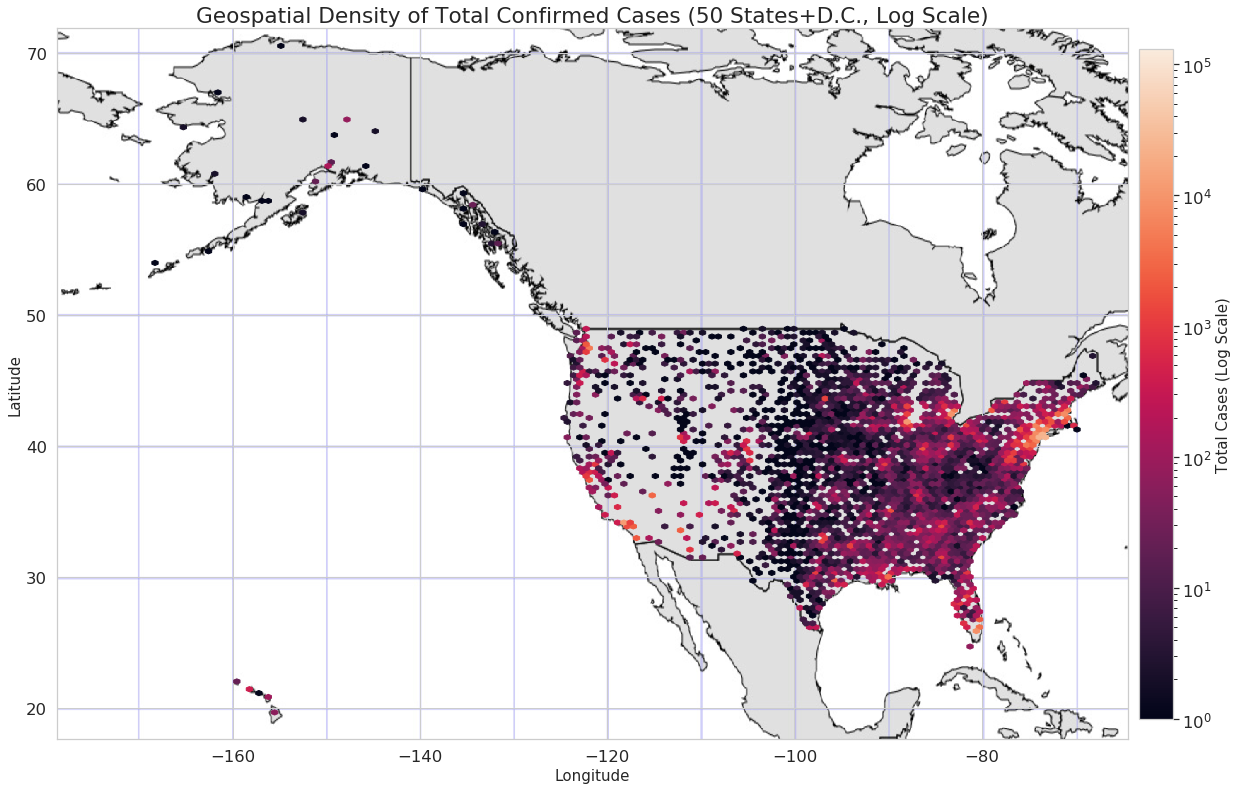

In [203]:
# List of all county geographical locations
counties_geo = counties_51.loc[:,["POP_LATITUDE", "POP_LONGITUDE", "PopulationEstimate2018"]]\
                .rename(columns={"POP_LATITUDE": "PLat", "POP_LONGITUDE": "PLon"})
# Add list of total cases in each county
counties_total_cases = confirmed_ordinal.loc[:,737533]
# Join geographical locations with total cases, and add a column for total cases normalized by population
geo_cases = counties_geo.join(counties_total_cases).dropna().rename(columns={737533: "total_cases"})
geo_cases["total_cases_normalized"] = (10**5)*geo_cases["total_cases"]/geo_cases["PopulationEstimate2018"]

# Map Boundaries
min_lon = geo_cases['PLon'].min()
max_lon = geo_cases['PLon'].max()
min_lat = geo_cases['PLat'].min()
max_lat = geo_cases['PLat'].max()
max_cases = geo_cases['total_cases'].max()
map_bound = ((min_lon-10.5, max_lon+3.1, min_lat-2.05, max_lat+1.35))
# Read in the base map and setting up subplot
basemap = plt.imread('us1.png')
fig, ax = plt.subplots(figsize = (20,20))
ax.set_xlim(map_bound[0],map_bound[1])
ax.set_ylim(map_bound[2],map_bound[3])

# Create the hexbin plot
rated_geo_counts = geo_cases.groupby(['PLon','PLat'], as_index=False).count()
hexbin_plot = plt.hexbin(geo_cases['PLon'], geo_cases['PLat'],
                         geo_cases['total_cases'], gridsize=150,
                         norm=colors.LogNorm(vmax=max_cases))
cb = plt.colorbar(hexbin_plot, fraction=0.03, pad=0.01)
cb.set_label('Total Cases (Log Scale)', size='small')
plt.xlabel('Longitude', size='small')
plt.ylabel('Latitude', size='small')
plt.title('Geospatial Density of Total Confirmed Cases (50 States+D.C., Log Scale)', size='large');
# Setting aspect ratio and plotting the hexbins on top of the base map layer
ax.imshow(basemap, zorder=0, extent=map_bound, aspect=1.4);

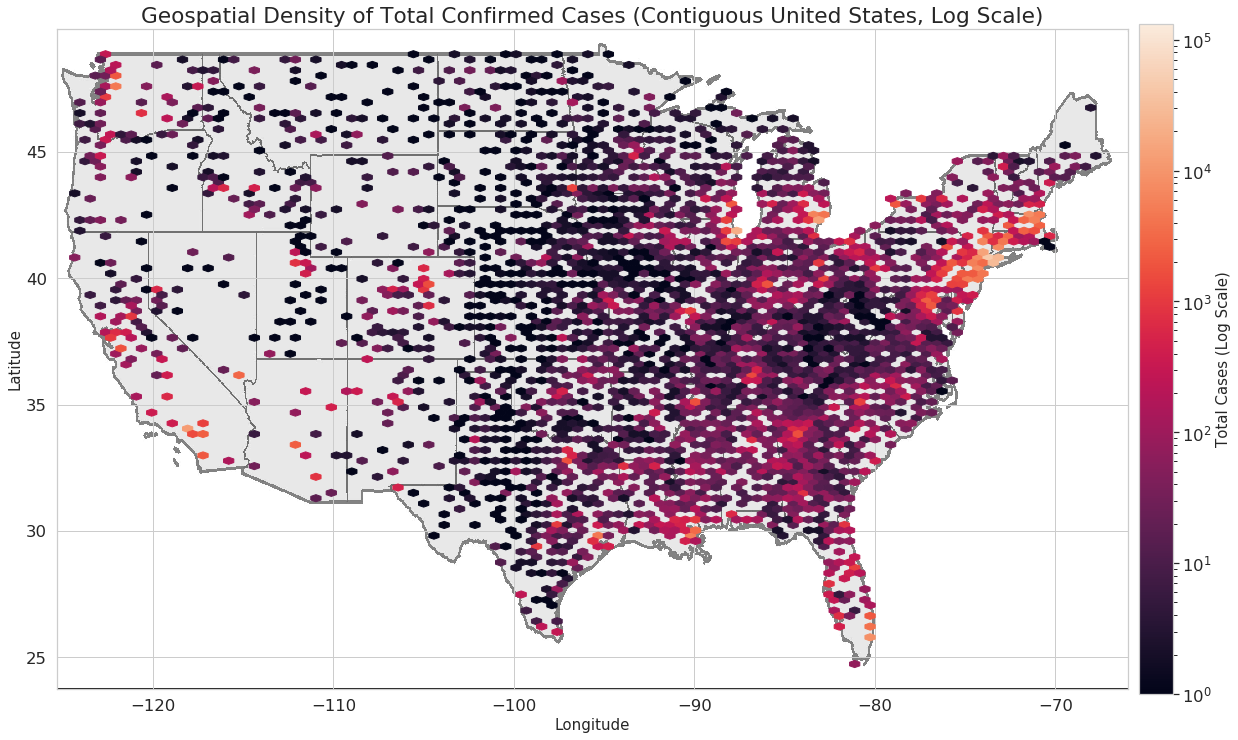

In [204]:
# List of all county geographical locations in the contiguous United States:
counties_geo_cntg = counties_51.loc[(counties_51["StateName"]!='AK') & (counties_51["StateName"]!='HI'),
                               ["POP_LATITUDE", "POP_LONGITUDE", "PopulationEstimate2018"]]\
                .rename(columns={"POP_LATITUDE": "PLat", "POP_LONGITUDE": "PLon"})
# Join geographical locations with total cases, and add a column for total cases normalized by population
geo_cases_cntg = counties_geo_cntg.join(counties_total_cases).dropna().rename(columns={737533: "total_cases"})
geo_cases_cntg["total_cases_normalized"] = (10**5)*geo_cases_cntg["total_cases"]/geo_cases_cntg["PopulationEstimate2018"]

# Map Boundaries
min_lon = geo_cases_cntg['PLon'].min()
max_lon = geo_cases_cntg['PLon'].max()
min_lat = geo_cases_cntg['PLat'].min()
max_lat = geo_cases_cntg['PLat'].max()
max_cases = geo_cases_cntg['total_cases'].max()
map_bound = ((min_lon-1, max_lon+1.5, min_lat-1, max_lat+1))

# Read in the base map and setting up subplot
basemap = plt.imread('us2.png')
fig, ax = plt.subplots(figsize = (20,20))
ax.set_xlim(map_bound[0],map_bound[1])
ax.set_ylim(map_bound[2],map_bound[3])

# Create the hexbin plot
rated_geo_counts = geo_cases_cntg.groupby(['PLon','PLat'], as_index=False).count()
hexbin_plot = plt.hexbin(geo_cases_cntg['PLon'], geo_cases_cntg['PLat'],
                         geo_cases_cntg['total_cases'], gridsize=100,
                         norm=colors.LogNorm(vmax=max_cases))
cb = plt.colorbar(hexbin_plot, fraction=0.03, pad=0.01)
cb.set_label('Total Cases (Log Scale)', size='small')
plt.xlabel('Longitude', size='small')
plt.ylabel('Latitude', size='small')
plt.title('Geospatial Density of Total Confirmed Cases (Contiguous United States, Log Scale)', size='large');
# Setting aspect ratio and plotting the hexbins on top of the base map layer
ax.imshow(basemap, zorder=0, extent=map_bound, aspect=1.4);

### Total Number of Confirmed Cases and Total Deaths, vs. Population

We create scatterplots to view the relationship between population and total confirmed cases or deaths, labeled by state.  There is a clear increasing linear relationship between $\log(\text{Population})$ in a state and $\log(\text{Total Confirmed Cases})$ and $\log(\text{Total Deaths})$ in that state, indicating that the relationships between population vs. confirmed cases and deaths can be described as:

$$\text{Total Confirmed Cases} = a\times(\text{Population})^b$$

$$\text{Total Deaths} = c\times(\text{Population})^d$$

The scatter plots below confirm our reasoning in the Question Framing section above that our measures of severity should be normalized by population, because we are more interested in the *proportion* of cases in a region than total number of cases.

In [205]:
ordinal_date_columns_str = [str(date) for date in list(ordinal_date_columns)]
stateTSconf = confirmed_data_wALHI.loc[:,["STATEFP","PopulationEstimate2018"]+ordinal_date_columns_str]\
            .groupby(["STATEFP"], as_index=False).sum().join(states_51["Province_State"], how="left", on="STATEFP")\
            .rename(columns={"Province_State":"State"})
stateTSdeaths = deaths_data_wALHI.loc[:,["STATEFP","PopulationEstimate2018"]+ordinal_date_columns_str]\
            .groupby(["STATEFP"], as_index=False).sum()
CasesAndPopByState = stateTSconf.loc[:,["State","PopulationEstimate2018","737533"]].sort_values("737533", ascending=False)\
                .join(stateTSdeaths.loc[:,'737533'], lsuffix="_confirmed", rsuffix="_deaths")\
                .rename(columns={"737533_confirmed":"Total Confirmed Cases",
                                 "737533_deaths":"Total Deaths", "PopulationEstimate2018":"Population"})
fig = px.scatter(CasesAndPopByState, x = "Population", y = "Total Confirmed Cases", text="State",
                 title="Population vs. Total Confirmed Cases by Region (Linear Scale)")
fig.update_traces(textposition='top center')

In [206]:
fig = px.scatter(CasesAndPopByState, x = "Population", y = "Total Confirmed Cases", text="State",
                 title="Population vs. Total Confirmed Cases by Region (Log Scale)")
fig.update_traces(textposition='top center')
fig.update_layout(xaxis_type="log", yaxis_type="log")

In [207]:
fig = px.scatter(CasesAndPopByState, x = "Population", y = "Total Deaths", text="State",
                                  title="Population vs. Total Deaths by Region (Log Scale)")
fig.update_traces(textposition='top center')
fig.update_layout(xaxis_type="log", yaxis_type="log")

The scatterplot below shows that the confirmed case intensity (total cases normalized by population) is not dependent on population alone.  Some regions still have high population and high case intensity (New York), but there are also several regions with small population and high case intensity (Rhode Island, District of Columbia), as well as several regions with high population and low case intensity (California, Texas).  Thus, our normalized measures of case intensity are appropriate for analysis as response variables against the explanatory variables defined in our Data Cleaning section above.

In [208]:
CasesAndPopByState["Confirmed Case Intensity"]=(10**5)*CasesAndPopByState["Total Confirmed Cases"]/CasesAndPopByState["Population"]
CasesAndPopByState["Death Intensity"]=(10**5)*CasesAndPopByState["Total Deaths"]/CasesAndPopByState["Population"]

fig = px.scatter(CasesAndPopByState, x="Population", y="Confirmed Case Intensity", text="State",
                                  title="Population vs. Case Intensity by Region (Log Scale)")
fig.update_traces(textposition='top center')
fig.update_layout(xaxis_type="log", yaxis_type="log")
fig.update_yaxes(title="Confirmed Case Intensity (Normalized by Population)")

### Case Intensity by Region

The following barplot shows the case intensity in each region at the state level.  We are able to identify the states with highest case intensity (New York, New Jersey), as well as the states with the lowest case intensity (Hawaii, Montana, Minnesota).

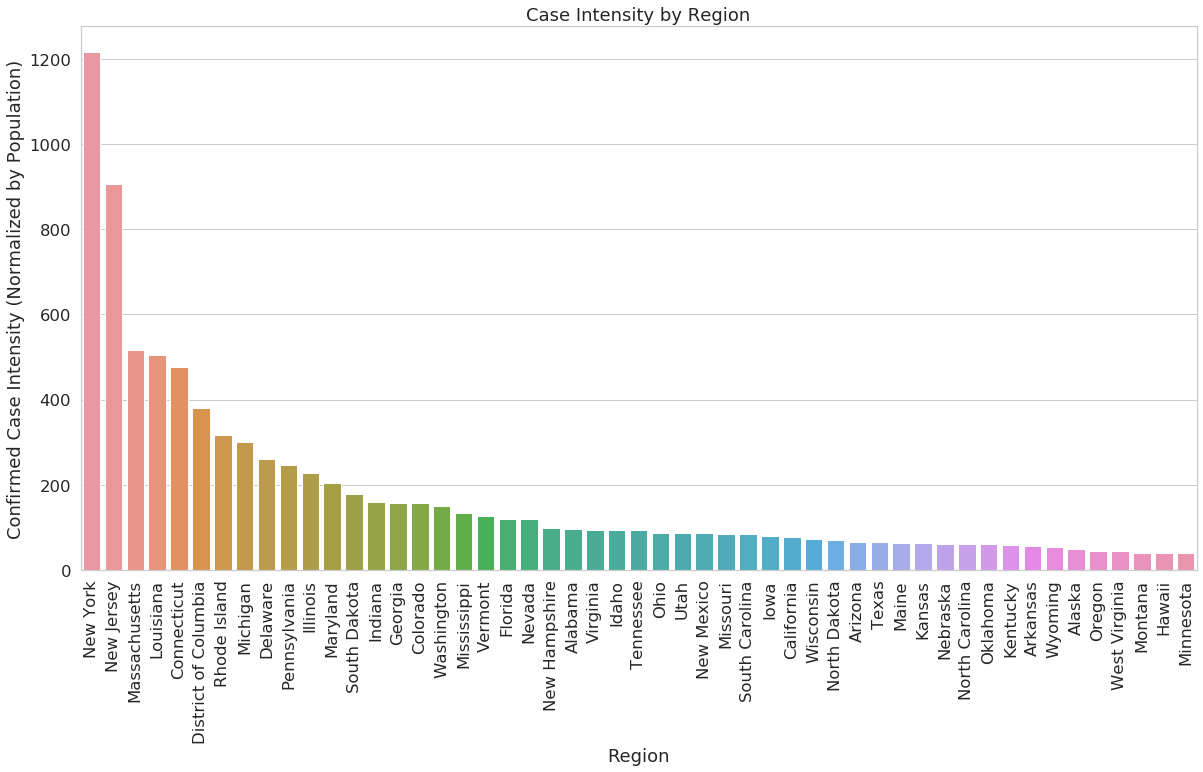

In [209]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(x="State", y="Confirmed Case Intensity", data = CasesAndPopByState.sort_values("Confirmed Case Intensity", ascending=False))
plt.ylabel("Confirmed Case Intensity (Normalized by Population)")
plt.xlabel("Region")
plt.title("Case Intensity by Region");

### Confirmed Case Intensity Over Time

We create lineplots to show the confirmed case intensity over time at the state and county levels.  We identify states with the top 10 and bottom 10 case intensities.  We also identify several states that showed a clear decrease in case growth over time.  The same is done at the county level.

These visualizations motivate us to look closely at interventions as the potential cause of decrease in growth rate, and as discussed in our Question Framing section above, we would like to focus on the adoption of stay-at-home orders as our intervention of interest.

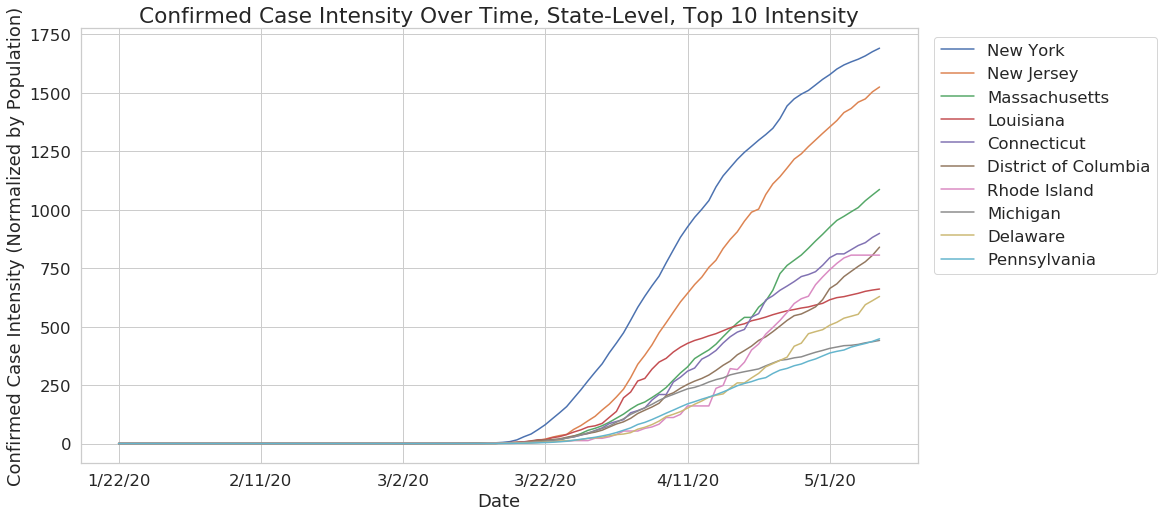

In [210]:
stateTS=stateTSconf.set_index("State").loc[:,ordinal_date_columns_str]
stateTS=(10**5)*stateTS.div(stateTSconf.set_index("State")["PopulationEstimate2018"], axis=0)

stateTStop10 = stateTS.loc[:,ordinal_date_columns_str].sort_values("737533", ascending=False).head(10).T
stateTStop10["Date"] = date_columns
stateTStop10.set_index("Date", inplace=True)

stateTStop10.plot(figsize=[15,8])
plt.legend(bbox_to_anchor=(1.01, 1))
plt.ylabel("Confirmed Case Intensity (Normalized by Population)")
plt.title("Confirmed Case Intensity Over Time, State-Level, Top 10 Intensity", size="large");

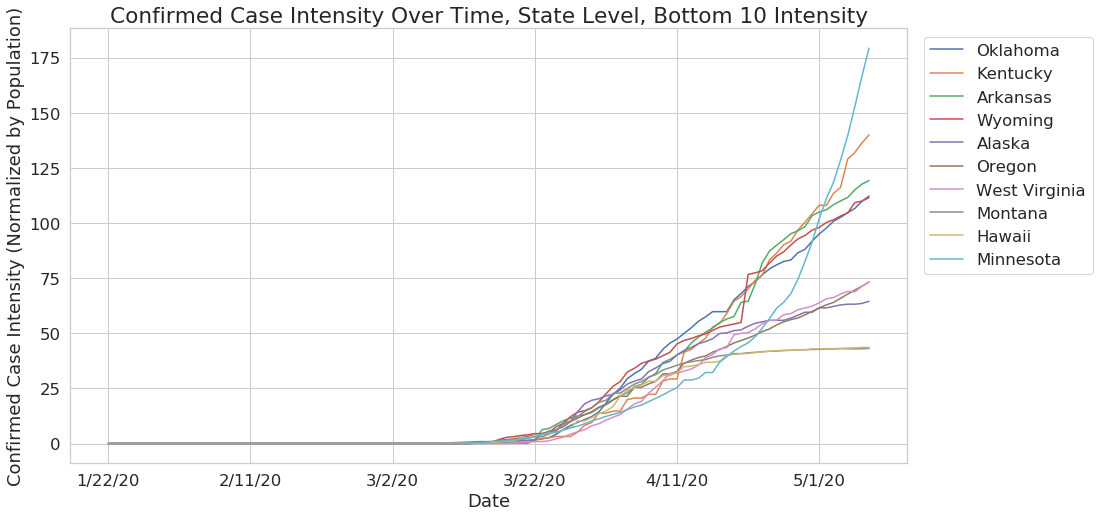

In [211]:
stateTSbot10 = stateTS.sort_values("737533", ascending=False).tail(10).T

stateTSbot10["Date"] = date_columns
stateTSbot10.set_index("Date", inplace=True)

stateTSbot10.plot(figsize=[15,8])
plt.legend(bbox_to_anchor=(1.01, 1))
plt.ylabel("Confirmed Case Intensity (Normalized by Population)")
plt.title("Confirmed Case Intensity Over Time, State Level, Bottom 10 Intensity", size="large");

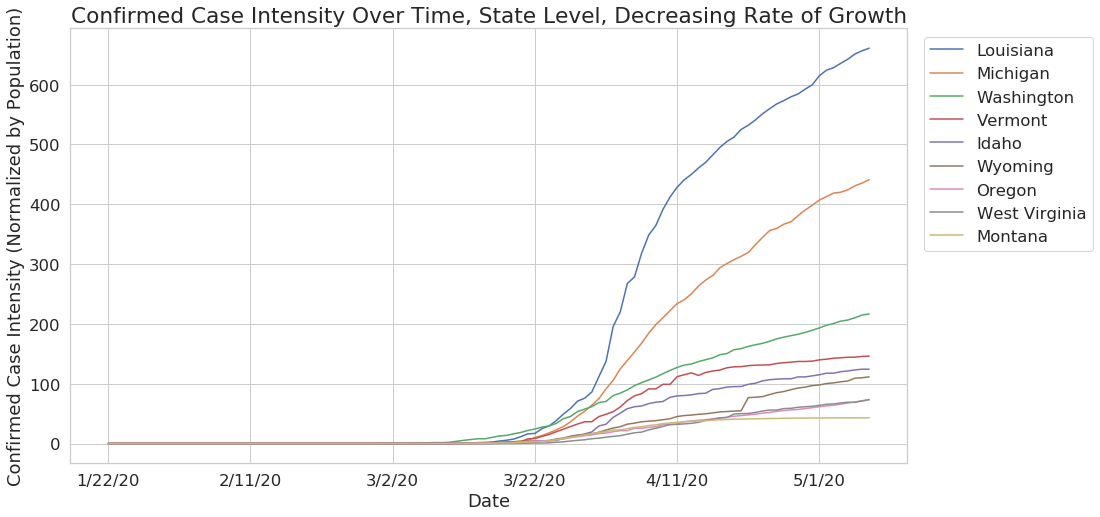

In [212]:
stateTSdec = stateTS.sort_values("737533", ascending=False).T\
                .loc[:,("Louisiana", "Michigan", "Washington", "Vermont", "Idaho", 
                        "Wyoming", "Oregon", "West Virginia", "Montana")]
stateTSdec["Date"] = date_columns
stateTSdec.set_index("Date", inplace=True)

stateTSdec.plot(figsize=[15,8])
plt.legend(bbox_to_anchor=(1.01, 1))
plt.ylabel("Confirmed Case Intensity (Normalized by Population)")
plt.title("Confirmed Case Intensity Over Time, State Level, Decreasing Rate of Growth", size="large");

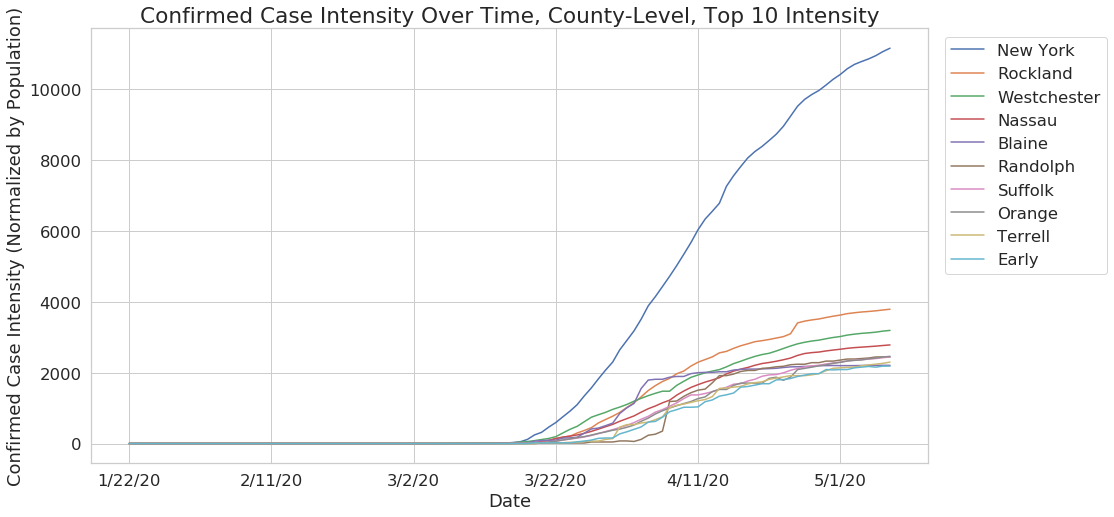

In [213]:
ordinal_date_columns_int = confirmed_data.iloc[:,-len(ordinal_date_columns):].columns
countyTS = confirmed_data.loc[:,["CountyName"]+list(ordinal_date_columns_int)].set_index("CountyName")
countyTStop10 = countyTS.sort_values("737533int", ascending=False).head(10).T
countyTStop10["Date"] = date_columns
countyTStop10.set_index("Date", inplace=True)

countyTStop10.plot(figsize=[15,8])
plt.legend(bbox_to_anchor=(1.01, 1))
plt.ylabel("Confirmed Case Intensity (Normalized by Population)")
plt.title("Confirmed Case Intensity Over Time, County-Level, Top 10 Intensity", size="large");

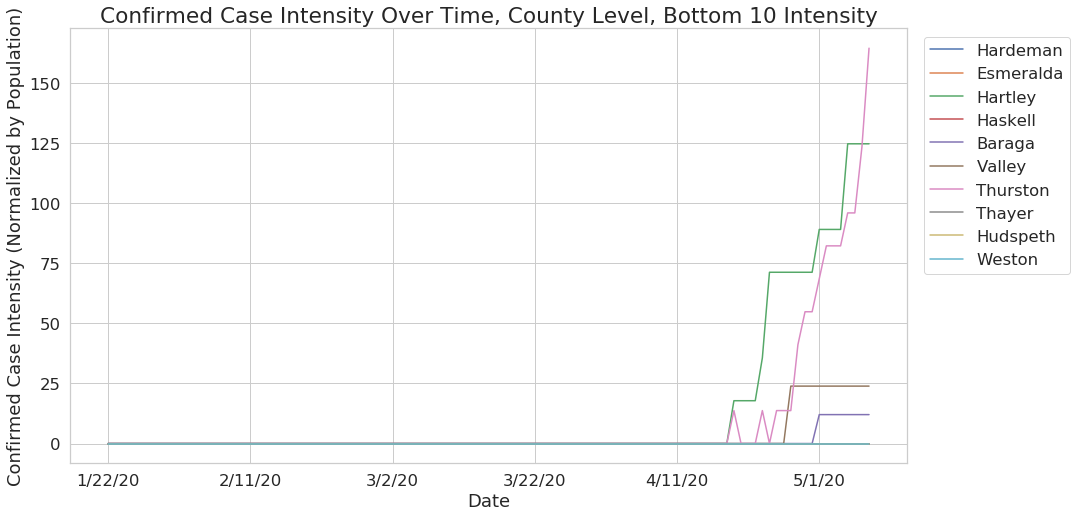

In [214]:
countyTSbot10 = countyTS.sort_values("737533int", ascending=False).tail(10).T

countyTSbot10["Date"] = date_columns
countyTSbot10.set_index("Date", inplace=True)

countyTSbot10.plot(figsize=[15,8])
plt.legend(bbox_to_anchor=(1.01, 1))
plt.ylabel("Confirmed Case Intensity (Normalized by Population)")
plt.title("Confirmed Case Intensity Over Time, County Level, Bottom 10 Intensity", size="large");

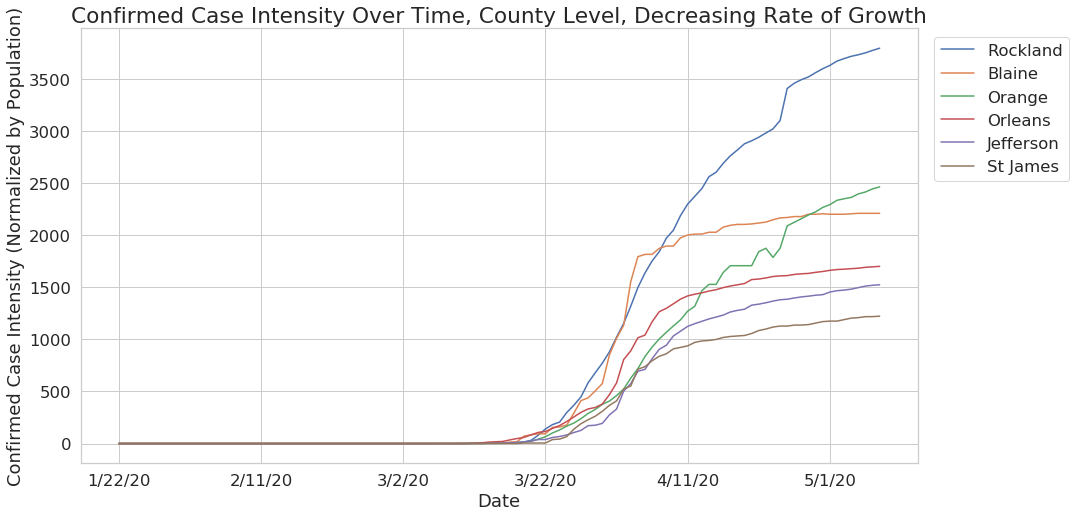

In [215]:
countyTSdec = countyTS.sort_values("737533int", ascending=False).iloc[1:100].T\
                .loc[:,("Rockland", "Blaine", "Orange", "Orleans", "Jefferson", "St James")]
countyTSdec["Date"] = date_columns
countyTSdec.set_index("Date", inplace=True)

countyTSdec.plot(figsize=[15,8])
plt.legend(bbox_to_anchor=(1.01, 1))
plt.ylabel("Confirmed Case Intensity (Normalized by Population)")
plt.title("Confirmed Case Intensity Over Time, County Level, Decreasing Rate of Growth", size="large");

## Method and Experiments
We now begin to answer our questions from the Question Framing section above.  We create a number of models, Model A - Model G, which evaluate our ability to predict our various measures of severity using our various factors.

The method for creating these models will include the following:
- Use a **90/10 Train/Test Split**: 90% training data, 10% test data, to split our original datasets, `confirmed_data` and `deaths_data`.
- Define **Explanatory Variables (factors)**: *static*, *dynamic*, *stay-at-home*, or other (feature-engineered based on these variables)
- **Normalize** Explanatory Variables by subtracting the mean and dividing by the variance:
$$ z = \frac{x - \textbf{Mean}(x)}{\textbf{StdDev}(x)}$$
- Define **Response Variables (severity)**: *confirmed case intensity*, *death intensity*, or *rate of spread (total, before intervention, or since intervention)*
- Create **Linear Regression** models and fit them between the explanatory and response variables.
- Use **Ridge Regression** to regularize our models.
- Use **k-fold Cross Validation** with $\boldsymbol{k=5}$ to evaluate validation error and estimate overfitting.

Below, we create a set of reusable functions, `rmse-score` and `RidgeModel`, to perform Cross-Validated Ridge Regression on any initial X and Y datasets.

In [216]:
# A set of functions to perform Cross-Validated Ridge Regression on any initial X and Y datasets
np.random.seed(42)
def rmse_score(model, X, y):
    return np.sqrt(np.mean((y - model.predict(X)) ** 2))
# Ridge Regression
def RidgeModel(X, Y, alpha):
    np.random.seed(42)
    alpha = alpha # The regularization hyperparameter
    Model = Ridge(alpha=alpha)
    # Train/Test Split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10)
    # Normalize Explanatory Variable
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)
    Model.fit(X_train, Y_train)
    # Evaluate the RMSE of the training error
    train_error = rmse_score(Model, X_train, Y_train)
    # Evaluate the RMSE of the validation error
    validation_error = np.mean(cross_val_score(Model, X_train, Y_train, scoring=rmse_score, cv=5))
    # Evaluate the weights of the features
    Weights = pd.DataFrame(zip(list(X.columns), list(Model.coef_)))\
            .rename(columns={0: "Static Factor", 1: "Weight"}).set_index('Static Factor')\
            .sort_values('Weight', ascending=True)
    return Model, X_test, Y_test, train_error, validation_error, Weights

### Question 1: Static Factors vs. Severity

We start with the first question, reiterated here:

1. Are a region's *static* factors correlated with the three measures of severity (*confirmed case intensity*, *death intensity*, and *rate of spread*) in that region?  If so, can we quantify what kinds of static factors are most highly correlated with the three measures of severity and thus infer a static factor's ability to predict severity?
(*With Data up to April 18th*)

# Listing weights by absolute value

#### Model A: Static Factors vs. Confirmed Case Intensity on April 18th

We begin with *confirmed case intensity* as our response variable and use a purely linear model for our prediction:

$$\text{Confirmed Case Intensity, Apr 18} = \sum_{i=1}^{N=\text{number of factors}}(\text{weight}_{i}\times\text{static factor}_{i})$$

We see that we achieve the following (not so good) RMSEs for this model. The units for RMSE are those of the confirmed case intensity, or [# confirmed cases per 100,000 people]:
- training RMSE: 209
- cross validation RMSE: 216
- test RMSE: 157

We also see that the most important features (those with the highest weights) in this model are:
- population density per square mile
- democrat-to-republican ratio
- proportion of population that are M.D.'s
- respiratory disease mortality rate

In [217]:
# Model A

# Define Explanatory and Response Variables
X_ModelA = confirmed_data.loc[:,objective_columns].drop("PopulationEstimate2018", axis=1)
Y_ModelA = confirmed_data.iloc[:,-1]

# Fit the model and evaluate on training and validation data
ModelA, X_testA, Y_testA, train_error, validation_error, Weights = RidgeModel(X_ModelA, Y_ModelA, 1000)
print("Training RMSE before hyperparameter tuning:", train_error)
print("Cross Validation RMSE before hyperparameter tuning:", validation_error)

Training RMSE before hyperparameter tuning: 463.6802626843498
Cross Validation RMSE before hyperparameter tuning: 461.39361651387054


In [218]:
# Tune hyperparameter alpha:

# Make a list of cross validation errors for each alpha
val_errs=list()
alphas = np.linspace(0,10000,200)
for alpha in alphas:
    Model, X_test, Y_test, tr_err, val_err, w = RidgeModel(X_ModelA, Y_ModelA, alpha)
    val_errs.append(val_err)

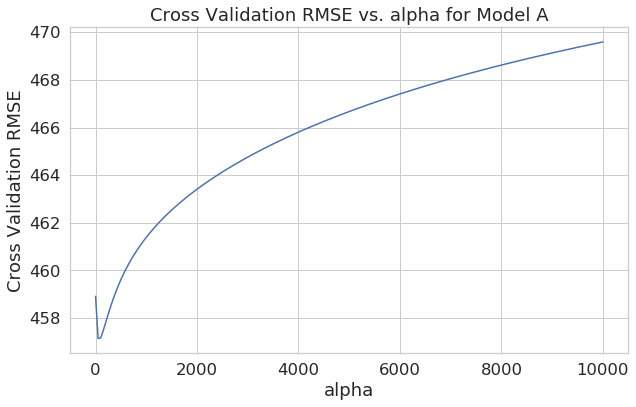

In [219]:
# Plot cross validation errors for each alpha to select the best alpha
plt.figure(figsize=[10,6])
plt.plot(alphas, val_errs)
plt.xlabel('alpha')
plt.ylabel('Cross Validation RMSE')
plt.title('Cross Validation RMSE vs. alpha for Model A');

In [31]:
# Use best alpha:
ModelA, X_testA, Y_testA, train_error, validation_error, Weights = RidgeModel(X_ModelA, Y_ModelA, 5000)
print("Training RMSE:", train_error)
print("Cross Validation RMSE:", validation_error)
display(Weights)

Training RMSE: 205.94728039608722
Cross Validation RMSE: 204.10392049189272


,Weight
Static Factor,
RespMortalityRate2014,-7.954366
Rural-UrbanContinuumCode2013,-4.896473
StrokeMortality,-3.597904
PopMale>842010,-2.509166
PopMale75-842010,-2.351672
PopMale65-742010,-2.254456
#EligibleforMedicare2018,-2.211219
"MedicareEnrollment,AgedTot2017",-1.709887
#Hospitals,-1.697528


In [32]:
# AFTER adjusting alpha for the Ridge Regression based on cross validation scores, evaluate the RMSE of the test error
ModelATestError = rmse_score(ModelA, X_testA, Y_testA)
print("Model A Test RMSE:", ModelATestError)

Model A Test RMSE: 181.98885244703607


#### Model B: Feature Engineering for Static Factors vs. Confirmed Case Intensity (Apr 18)

We now try to improve on Model A by using squared and square root transform to create new features:

$$\text{Confirmed Case Intensity, Apr 18} =
\sum_{i=1}^{N=\text{number of factors}}(\text{weight}_{i}\times\text{static factor}_{i}) + \sum_{j=1}^{N=\text{number of factors}}(\text{weight}_{j}\times{\text{static factor}_{j}^{2}}) + \sum_{k=1}^{N=\text{number of factors}}(\text{weight}_{k}\times\sqrt{(\text{static factor}_{k}})$$

We see that we can achieve the following RMSEs for this model, which is not much better than Model A:
- training RMSE: 193
- cross validation RMSE: 212
- test RMSE: 155

We also see that the most important features (those with the highest weights) in this model are:
- population density per square mile$^2$
- population density per square mile
- $\sqrt{\text{population density per square mile}}$
- proportion of population that are M.D.'s

This indicates that transforming some features did help Model B fit the data, but since there was not a significant decrease in RMSE, we cannot conclude that Model B is better than Model A.

In [33]:
# Model B

# Define Explanatory and Response Variables
X_ModelBsq=(X_ModelA)**2
X_ModelBsqrt=(X_ModelA)**0.5
X_ModelB=X_ModelA.join(X_ModelBsq, rsuffix="_sq").join(X_ModelBsqrt, rsuffix="_sqrt")
Y_ModelB = Y_ModelA

# Fit the model and evaluate on training and validation data
ModelB, X_testB, Y_testB, train_error, validation_error, Weights = RidgeModel(X_ModelB, Y_ModelB, 1000)
print("Training RMSE before hyperparameter tuning:", train_error)
print("Cross Validation RMSE before hyperparameter tuning:", validation_error)

Training RMSE before hyperparameter tuning: 177.8270654880094
Cross Validation RMSE before hyperparameter tuning: 199.6181650874239


In [34]:
# Tune hyperparameter alpha:

# Make a list of cross validation errors for each alpha
val_errs=list()
alphas = np.linspace(0,10000,200)
for alpha in alphas:
    Model, X_test, Y_test, tr_err, val_err, w = RidgeModel(X_ModelB, Y_ModelB, alpha)
    val_errs.append(val_err)

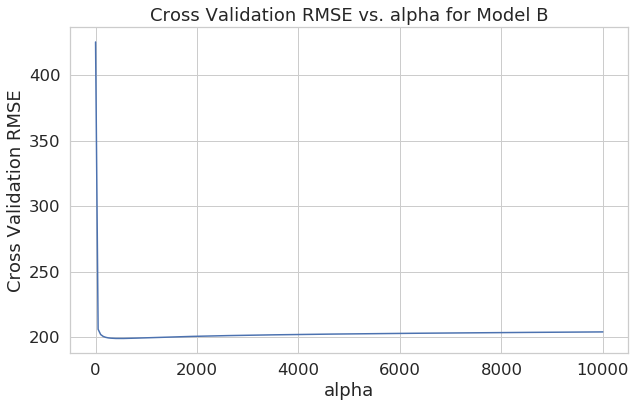

In [35]:
# Plot cross validation errors for each alpha to select the best alpha
plt.figure(figsize=[10,6])
plt.plot(alphas, val_errs)
plt.xlabel('alpha')
plt.ylabel('Cross Validation RMSE')
plt.title('Cross Validation RMSE vs. alpha for Model B');

In [36]:
# Use best alpha:
ModelB, X_testB, Y_testB, train_error, validation_error, Weights = RidgeModel(X_ModelB, Y_ModelB, 5000)
print("Training RMSE:", train_error)
print("Cross Validation RMSE:", validation_error)
display(Weights.head(10))

Training RMSE: 190.76704572050804
Cross Validation RMSE: 202.58391944592492


,Weight
Static Factor,
RespMortalityRate2014_sqrt,-5.211517
RespMortalityRate2014,-4.478558
RespMortalityRate2014_sq,-3.289904
StrokeMortality_sqrt,-2.824724
Rural-UrbanContinuumCode2013_sqrt,-2.552235
Rural-UrbanContinuumCode2013,-1.899521
StrokeMortality,-1.827295
PopMale>842010_sqrt,-1.609562
#ICU_beds_sq,-1.539324


In [37]:
# AFTER adjusting alpha for the Ridge Regression based on cross validation scores, evaluate the RMSE of the test error
ModelBTestError = rmse_score(ModelB, X_testB, Y_testB)
print("Model B Test RMSE:", ModelBTestError)

Model B Test RMSE: 190.7691445312811


#### Model C: Static Factors vs. Death Intensity (Apr 18)

We now move onto *death intensity* as our response variable and use both linear and nonlinear transformations of our the *static* factors as the explanatory variables:

$$\text{Death Intensity, Apr 18} =
\sum_{i=1}^{N=\text{number of factors}}(\text{weight}_{i}\times\text{static factor}_{i}) + \sum_{j=1}^{N=\text{number of factors}}(\text{weight}_{j}\times{\text{static factor}_{j}^{2}}) + \sum_{k=1}^{N=\text{number of factors}}(\text{weight}_{k}\times\sqrt{(\text{static factor}_{k}})$$

We see that we can achieve the following RMSEs for this model, which similarly poor results as Model A and Model B:
- training RMSE: 192
- cross validation RMSE: 211
- test RMSE: 177

We also see that the most important features (those with the highest weights) in this model are:
- population density per square mile$^2$
- population density per square mile
- $\sqrt{\text{population density per square mile}}$
- $\sqrt{\text{respiratory disease mortality rate}}$

This indicates that transforming some features did help Model C fit the data, but since there is still too high of an RMSE for the model to be of great use for prediction.

In [38]:
# Model C

# Define Explanatory and Response Variables
X_ModelClin = deaths_data.loc[:,objective_columns].drop("PopulationEstimate2018", axis=1)
X_ModelCsq=(X_ModelClin)**2
X_ModelCsqrt=(X_ModelClin)**0.5
X_ModelC=X_ModelClin.join(X_ModelCsq, rsuffix="_sq").join(X_ModelCsqrt, rsuffix="_sqrt")

Y_ModelC = deaths_data.iloc[:,-1]

# Fit the model and evaluate on training and validation data
ModelC, X_testC, Y_testC, train_error, validation_error, Weights = RidgeModel(X_ModelC, Y_ModelC, 1000)
print("Training RMSE before hyperparameter tuning:", train_error)
print("Cross Validation RMSE before hyperparameter tuning:", validation_error)

Training RMSE before hyperparameter tuning: 177.8270654880094
Cross Validation RMSE before hyperparameter tuning: 199.6181650874239


In [39]:
# Tune hyperparameter alpha:

# Make a list of cross validation errors for each alpha
val_errs=list()
alphas = np.linspace(0,10000,200)
for alpha in alphas:
    Model, X_test, Y_test, tr_err, val_err, w = RidgeModel(X_ModelC, Y_ModelC, alpha)
    val_errs.append(val_err)

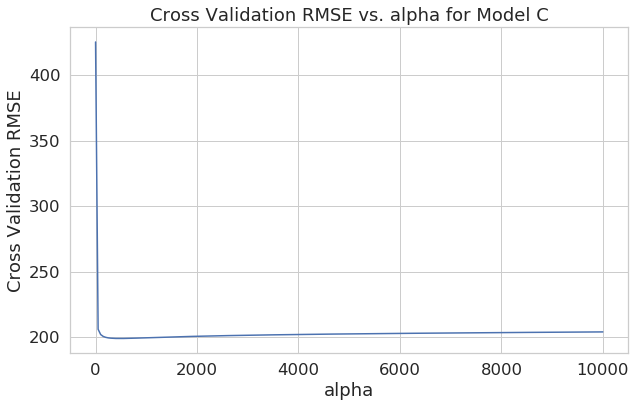

In [40]:
# Plot cross validation errors for each alpha to select the best alpha
plt.figure(figsize=[10,6])
plt.plot(alphas, val_errs)
plt.xlabel('alpha')
plt.ylabel('Cross Validation RMSE')
plt.title('Cross Validation RMSE vs. alpha for Model C');

In [41]:
# Use best alpha:
ModelC, X_testC, Y_testC, train_error, validation_error, Weights = RidgeModel(X_ModelC, Y_ModelC, 5000)
print("Training RMSE:", train_error)
print("Cross Validation RMSE:", validation_error)
display(Weights.head(10))

Training RMSE: 190.76704572050804
Cross Validation RMSE: 202.58391944592492


,Weight
Static Factor,
RespMortalityRate2014_sqrt,-5.211517
RespMortalityRate2014,-4.478558
RespMortalityRate2014_sq,-3.289904
StrokeMortality_sqrt,-2.824724
Rural-UrbanContinuumCode2013_sqrt,-2.552235
Rural-UrbanContinuumCode2013,-1.899521
StrokeMortality,-1.827295
PopMale>842010_sqrt,-1.609562
#ICU_beds_sq,-1.539324


In [42]:
# AFTER adjusting alpha for the Ridge Regression based on cross validation scores, evaluate the RMSE of the test error
ModelCTestError = rmse_score(ModelC, X_testC, Y_testC)
print("Model C Test RMSE:", ModelCTestError)

Model C Test RMSE: 190.7691445312811


#### Model D: Static Factors vs. Rate of Spread Before Intervention (first day of confirmed cases - first day of an intervention)

Finally for Question 1, we look at *rate of spread* (before interventions) as our response variable and use both linear and nonlinear transformations of our the *static* factors as the explanatory variables:

$$\text{Rate of Spread Before Interventions} = \sum_{i=1}^{N=\text{number of factors}}(\text{weight}_{i}\times\text{static factor}_{i})$$

### Question 2: Dynamic Factors vs. Rate of Spread

Our second question is reiterated here:

2. Are a region's *dynamic* factors correlated with *rate of spread* in that region?  If so, can we quantify which dynamic factors are most highly correlated with rate of spread and thus infer the relative success or lack thereof of the various interventions?
(*With Data up to April 18th*)

#### Model E: Dynamic Factors vs. Rate of Spread Since Intervention (first day of an intervention-Apr 18)
$$\text{Confirmed Case Intensity} = \sum_{i=1}^{N=\text{number of factors}}(\text{weight}_{i}\times\text{dynamic factor}_{i})$$

$$\text{Death Intensity} = \sum_{i=1}^{N=\text{number of factors}}(\text{weight}_{i}\times\text{dynamic factor}_{i})$$

Dynamic  log linear vs. Rate of Spread, pre vs post intervention

- Make a column of first day with a confirmed case
- For each type of intervention, Make a column of first day of intervention
- Try stay at home order as main intervention
- Rates before and after for states with stay-at-home
> -  change in rate -- relative effect of intervention
- Rate total for state w/o stay-at-home (optional)
- Eliminate counties w/zero cases or <1000 cases
- Eliminate counties w/o stay-at-home

### Question 3: Stay-at-Home Orders' relative impact on Rate of Spread

Moving on to our third question from the Question Framing section above, reiterated here:
3. Does the introduction of a *stay-at-home* order, on its own, affect the *rate of spread*?  Can we infer the effectiveness of the stay-at-home order based on the magnitude of the effect?
(*With Data up to April 18th*)

#### Model F: Stay-at-Home vs. Rate of Spread Since Stay-at-Home order (first day of an stay-at-home - Apr 18)

1. *Case Intensity*:


- in `states`, 'Confirmed' and 'Deaths' (normalized by population using 'PopulationEstimate2018' from `counties`)
- in `confirmed` and `deaths`, on a specific date (normalized by population using 'PopulationEstimate2018' from `counties`).  Dates we are interested in:
> - the first day of recorded data: '1/22/20' ('737446' in ordinal) 
> - the first day of confirmed cases (varies by county)
> - the first day an intervention is adopted (varies by intervention and by county)
> - the last day of recorded data: '4/18/20' ('737533' in ordinal) or '5/8/20' ('737553' in ordinal)


2. *Rate of Spread*:


- in `confirmed` and `deaths`, time periods between the first day of recorded data, '1/22/20' ('737446' in ordinal), through to the most recent date, '4/18/20' ('737533' in ordinal) or '5/8/20' ('737553' in ordinal) (normalized by population using 'PopulationEstimate2018' from `counties`).  Time periods we are interested in:
> - total: the first day of confirmed cases in a region (varies by county) to the last day of recorded data ('4/18/20' ('737533' in ordinal) or '5/8/20' ('737553' in ordinal))
> - before intervention: the first day of confirmed cases in a region (varies by county) to the first day of an intervention in the region (varies by intervention and by county)
> - since intervention: the first day of an intervention in a region (varies by intervention and by county) to the last day of recorded data ('4/18/20' ('737533' in ordinal) or '5/8/20' ('737553' in ordinal))

In [43]:
confirmed_data.loc[:,(interventions_columns)]
# Make a column of first day with a confirmed case
# For each type of intervention, Make a column of first day of intervention
# Try stay at home order as main intervention
# Rates before and after for states with stay-at-home
    # change in rate -- relative effect of intervention
# Rate total for state w/o stay-at-home

,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,stay at home
1001,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,737519.0
1003,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,737519.0
1005,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,737519.0
1007,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,737519.0
1009,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,737519.0
...,...,...,...,...,...,...,...,...
56037,737504.0,737504.0,737504.0,737503.0,737503.0,737500.0,737495.0,737512.0
56039,737504.0,737504.0,737504.0,737503.0,737503.0,737500.0,737495.0,737512.0
56041,737504.0,737504.0,737504.0,737503.0,737503.0,737500.0,737495.0,737512.0
56043,737504.0,737504.0,737504.0,737503.0,737503.0,737500.0,737495.0,737512.0


### Question 4: Predicting Future Trends with Historical Trends

Finally, we reach our fourth and last question from the Question Framing section above, reiterated here:

4. Can historical trends help inform future trends in severity?  That is, can the best model we come up with to predict severity in Questions 1-3 be used to accurately predict severity between April 18th and May 8th? If so, are static factors or dynamic factors more useful to predict future trends?
(*With Data up to May 8th*)

#### Model G: Predicting Future Trends with Historical Trends

Simple model fit, include all static factors, and stay-at-home order, fit thru 4/18, error on top 100 counties with newer data (5/8).  How well does our model predict future?

### Getting a closer fit? Proposed By-Day Nonlinear Model for Rate of Spread (Experimental Model H)

We are interested in seeing if we can build an even higher-resolution model for predicting rate of spread, **by day**.

For the total number of confirmed cases $y$ on day $t$, a simple model for the rate of spread by day would be:

$y(t) = y(t-1) \cdot s$

Where the spreading speed $s >= 1$ and is influenced by various features. Features of interest includes 

1. static (time-independent) features $x^s_i$, i.e. demographic condition like local population density and age distribution
1. dynamic (time-dependent) features $x^d_i = x^d_i(t)$, i.e. interventions or testing conditions change at a given day, thus a function of t.

Which gives us

$s = a^s_i x^s_i + a^d_i x^d_i$

Its worth noting that dynamic features have different effects on the confirmation, as inteventions like travelling ban will hinder the virus spread directly but the effect on case confirmation will gradually show only after the incubation period, while an upgrade in testing condition will report more confirmation cases at that day instantly. Taking this into consideration we have

$s = a^s_i x^s_i + a^d_i x^d_i + a^f_i x^f_i$

Where features affecting case confirmation effective $x^d_i = x^d_i(t)$ is a function of day $t$, and features affecting infection $a^f_i = a^f_i(t-t_1)$ at day $t$ is a function of $(t-t_1)$. Now confirmed cases $y(t)$ at a specific day $t$

$y(t) = y(t-1)(a^s_i x^s_i + a^d_i x^d_i + a^f_i x^f_i)$

| Variable 	| Meaning                                                                          	| Example and notes                                      	|
|:--------:	|----------------------------------------------------------------------------------	|--------------------------------------------------------	|
|   $t_1$  	| delay between infection and confirmation                                         	| incubation period + time spent on confirmation         	|
|    $t$   	| day $t>t_1$                                                                      	| An exact day in ordinal form, like 737510              	|
| $x^s_i$  	| static (time-independent) features                                               	| age, gender and population distribution                	|
| $x^d_i$  	| dynamic (time-dependent) features affecting infection effective at day t         	| interventions                                          	|
| $x^f_i$  	| dynamic (time-dependent) features affecting case confirmation effective at day t 	| testing equipment abundance                            	|
|    $a$   	| constant parameters of corresponding features                                    	| the larger the more effective of corresponding feature 	|

Though not accurate, $s = a^s_i x^s_i + a^d_i x^d_i + a^f_i x^f_i$ can be used to describe spreading speed to some extent, and can be used to predict future trends.

With the provided data there isn't enough information regarding the $x^f_i$, i.e. testing condition like testing equipment abundance throughout time. This actually has a huge effect on the confirmation number and should not be neglected. It can be predicted that without these information our model will be imprecise.

To sum up, following model will be used:

$y(t) = y(t-1)(a^s_i x^s_i + a^d_i x^d_i)$

$\frac{y(t)}{y(t-1)} = a^s_i x^s_i + a^d_i x^d_i$ which can be linear regressed

#### Further data cleaning
Join all tables and drop irrelevant columns, so are the columns that could cause linear correlation.

In [220]:
# further data cleaning
# inner Join counties, confirmed, death
rawdata = counties_51.join(pd.DataFrame(confirmed_ordinal), how='inner')\
                     .join(pd.DataFrame(deaths_ordinal), how='inner', lsuffix='_confirmed', rsuffix='_deaths')
date_columns_confirmed = list(pd.core.indexes.base.Index(ordinal_date_columns.astype(str)) + '_confirmed')
date_columns_deaths = list(pd.core.indexes.base.Index(ordinal_date_columns.astype(str)) + '_deaths')

# calculate proportions
static_columns_to_norm = [#'PopTotalFemale2017', 'PopTotalMale2017', removed to avoid linear correlation
                          #'PopulationEstimate65+2017', removed to avoid linear correlation
                          '#EligibleforMedicare2018',
                          'MedicareEnrollment,AgedTot2017',
                          '#FTEHospitalTotal2017',
                          "TotalM.D.'s,TotNon-FedandFed2017",
                          '#HospParticipatinginNetwork2017',
                          '#Hospitals',
                          '#ICU_beds',
                          'PopMale<52010','PopFmle<52010',
                          'PopMale5-92010', 'PopFmle5-92010',
                          'PopMale10-142010','PopFmle10-142010',
                          'PopMale15-192010', 'PopFmle15-192010',
                          'PopMale20-242010', 'PopFmle20-242010',
                          'PopMale25-292010', 'PopFmle25-292010',
                          'PopMale30-342010', 'PopFmle30-342010',
                          'PopMale35-442010', 'PopFmle35-442010',
                          'PopMale45-542010', 'PopFmle45-542010',
                          'PopMale55-592010', 'PopFmle55-592010',
                          'PopMale60-642010', 'PopFmle60-642010',
                          'PopMale65-742010', 'PopFmle65-742010',
                          'PopMale75-842010', 'PopFmle75-842010',
                          'PopMale>842010', 'PopFmle>842010']
static_columns_as_is = ['Rural-UrbanContinuumCode2013',
                        'PopulationDensityperSqMile2010',
                        'DiabetesPercentage',
                        #'HeartDiseaseMortality',
                        #'StrokeMortality',
                        'Smokers_Percentage',
                        #'RespMortalityRate2014',
                        'dem_to_rep_ratio']
static_columns_normed = list(pd.Series(static_columns_to_norm) + "_proportion")

rawdata[static_columns_normed] = rawdata[static_columns_to_norm].div(rawdata["PopulationEstimate2018"], axis=0)
static_columns = static_columns_as_is + static_columns_normed

# combine county name, state name, static factors, dynamic factors, and severity measures into final cleaned dataset `data`.
data = rawdata[["CountyName", "State", "StateName"] + static_columns + interventions_columns + date_columns_confirmed + date_columns_deaths]

#### Preview days of interest redarding intervention

In [224]:
data

,CountyName,State,StateName,Rural-UrbanContinuumCode2013,PopulationDensityperSqMile2010,DiabetesPercentage,Smokers_Percentage,dem_to_rep_ratio,#EligibleforMedicare2018_proportion,"MedicareEnrollment,AgedTot2017_proportion",#FTEHospitalTotal2017_proportion,"TotalM.D.'s,TotNon-FedandFed2017_proportion",#HospParticipatinginNetwork2017_proportion,#Hospitals_proportion,#ICU_beds_proportion,PopMale<52010_proportion,PopFmle<52010_proportion,PopMale5-92010_proportion,PopFmle5-92010_proportion,PopMale10-142010_proportion,PopFmle10-142010_proportion,PopMale15-192010_proportion,PopFmle15-192010_proportion,PopMale20-242010_proportion,PopFmle20-242010_proportion,PopMale25-292010_proportion,PopFmle25-292010_proportion,PopMale30-342010_proportion,PopFmle30-342010_proportion,PopMale35-442010_proportion,PopFmle35-442010_proportion,PopMale45-542010_proportion,PopFmle45-542010_proportion,PopMale55-592010_proportion,PopFmle55-592010_proportion,PopMale60-642010_proportion,PopFmle60-642010_proportion,PopMale65-742010_proportion,PopFmle65-742010_proportion,PopMale75-842010_proportion,PopFmle75-842010_proportion,PopMale>842010_proportion,PopFmle>842010_proportion,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,stay at home,737446_confirmed,737447_confirmed,737448_confirmed,737449_confirmed,737450_confirmed,737451_confirmed,737452_confirmed,737453_confirmed,737454_confirmed,737455_confirmed,737456_confirmed,737457_confirmed,737458_confirmed,737459_confirmed,737460_confirmed,737461_confirmed,737462_confirmed,737463_confirmed,737464_confirmed,737465_confirmed,737466_confirmed,737467_confirmed,737468_confirmed,737469_confirmed,737470_confirmed,737471_confirmed,737472_confirmed,737473_confirmed,737474_confirmed,737475_confirmed,737476_confirmed,737477_confirmed,737478_confirmed,737479_confirmed,737480_confirmed,737481_confirmed,737482_confirmed,737483_confirmed,737484_confirmed,737485_confirmed,737486_confirmed,737487_confirmed,737488_confirmed,737489_confirmed,737490_confirmed,737491_confirmed,737492_confirmed,737493_confirmed,737494_confirmed,737495_confirmed,737496_confirmed,737497_confirmed,737498_confirmed,737499_confirmed,737500_confirmed,737501_confirmed,737502_confirmed,737503_confirmed,737504_confirmed,737505_confirmed,737506_confirmed,737507_confirmed,737508_confirmed,737509_confirmed,737510_confirmed,737511_confirmed,737512_confirmed,737513_confirmed,737514_confirmed,737515_confirmed,737516_confirmed,737517_confirmed,737518_confirmed,737519_confirmed,737520_confirmed,737521_confirmed,737522_confirmed,737523_confirmed,737524_confirmed,737525_confirmed,737526_confirmed,737527_confirmed,737528_confirmed,737529_confirmed,737530_confirmed,737531_confirmed,737532_confirmed,737533_confirmed,737534_confirmed,737535_confirmed,737536_confirmed,737537_confirmed,737538_confirmed,737539_confirmed,737540_confirmed,737541_confirmed,737542_confirmed,737543_confirmed,737544_confirmed,737545_confirmed,737546_confirmed,737547_confirmed,737548_confirmed,737549_confirmed,737550_confirmed,737551_confirmed,737552_confirmed,737553_confirmed,737446_deaths,737447_deaths,737448_deaths,737449_deaths,737450_deaths,737451_deaths,737452_deaths,737453_deaths,737454_deaths,737455_deaths,737456_deaths,737457_deaths,737458_deaths,737459_deaths,737460_deaths,737461_deaths,737462_deaths,737463_deaths,737464_deaths,737465_deaths,737466_deaths,737467_deaths,737468_deaths,737469_deaths,737470_deaths,737471_deaths,737472_deaths,737473_deaths,737474_deaths,737475_deaths,737476_deaths,737477_deaths,737478_deaths,737479_deaths,737480_deaths,737481_deaths,737482_deaths,737483_deaths,737484_deaths,737485_deaths,737486_deaths,737487_deaths,737488_deaths,737489_deaths,737490_deaths,737491_deaths,737492_deaths,737493_deaths,737494_deaths,737495_deaths,737496_deaths,737497_deaths,737498_deaths,737499_deaths,737500_deaths,737501_deaths,737502_deaths,737503_deaths,737504_deaths,737505_deaths,737506_deaths,737507_deaths,7375

In [221]:
# using median inbubation period of 5.1 days as guidance
# print("earliest interventions: ")
print(data[interventions_columns].min())
print("latest interventions: ")
print(data[interventions_columns].max())

>50 gatherings        737499.0
>500 gatherings       737495.0
public schools        737499.0
restaurant dine-in    737496.0
entertainment/gym     737496.0
federal guidelines    737500.0
foreign travel ban    737495.0
stay at home          737503.0
dtype: float64
latest interventions: 
>50 gatherings        737517.0
>500 gatherings       737517.0
public schools        737517.0
restaurant dine-in    737519.0
entertainment/gym     737521.0
federal guidelines    737500.0
foreign travel ban    737495.0
stay at home          737522.0
dtype: float64


As shown above, interested date range: 737495 to 737521, plus incubation period. Consider median inbubation period* of 5.1 days as guidance, assume a delay between catching the virus and being confirmed, ranging from 3 to 24 days.

Iterating all of the possible delay, find the delay corresponding to the best score of our model as the "best delay". Considering the time consumed on confirmation, reasonable "best delay" should be a little larger than the median inbubation period of 5.1 days.

To avoid excessive noises especially from inconsistant confirmed cases at weekends, the confirmed cases is culled one out of every 7 days.

To avoid noises from small numbers of cases, only specimen of more than 50 cases will be considered.

*Lauer, Stephen A., Kyra H. Grantz, Qifang Bi, Forrest K. Jones, Qulu Zheng, Hannah R. Meredith, Andrew S. Azman, Nicholas G. Reich, and Justin Lessler. "The incubation period of coronavirus disease 2019 (COVID-19) from publicly reported confirmed cases: estimation and application." Annals of internal medicine (2020).

In [596]:
data

,CountyName,State,StateName,Rural-UrbanContinuumCode2013,PopulationDensityperSqMile2010,DiabetesPercentage,Smokers_Percentage,dem_to_rep_ratio,#EligibleforMedicare2018_proportion,"MedicareEnrollment,AgedTot2017_proportion",#FTEHospitalTotal2017_proportion,"TotalM.D.'s,TotNon-FedandFed2017_proportion",#HospParticipatinginNetwork2017_proportion,#Hospitals_proportion,#ICU_beds_proportion,PopMale<52010_proportion,PopFmle<52010_proportion,PopMale5-92010_proportion,PopFmle5-92010_proportion,PopMale10-142010_proportion,PopFmle10-142010_proportion,PopMale15-192010_proportion,PopFmle15-192010_proportion,PopMale20-242010_proportion,PopFmle20-242010_proportion,PopMale25-292010_proportion,PopFmle25-292010_proportion,PopMale30-342010_proportion,PopFmle30-342010_proportion,PopMale35-442010_proportion,PopFmle35-442010_proportion,PopMale45-542010_proportion,PopFmle45-542010_proportion,PopMale55-592010_proportion,PopFmle55-592010_proportion,PopMale60-642010_proportion,PopFmle60-642010_proportion,PopMale65-742010_proportion,PopFmle65-742010_proportion,PopMale75-842010_proportion,PopFmle75-842010_proportion,PopMale>842010_proportion,PopFmle>842010_proportion,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,stay at home,737446_confirmed,737447_confirmed,737448_confirmed,737449_confirmed,737450_confirmed,737451_confirmed,737452_confirmed,737453_confirmed,737454_confirmed,737455_confirmed,737456_confirmed,737457_confirmed,737458_confirmed,737459_confirmed,737460_confirmed,737461_confirmed,737462_confirmed,737463_confirmed,737464_confirmed,737465_confirmed,737466_confirmed,737467_confirmed,737468_confirmed,737469_confirmed,737470_confirmed,737471_confirmed,737472_confirmed,737473_confirmed,737474_confirmed,737475_confirmed,737476_confirmed,737477_confirmed,737478_confirmed,737479_confirmed,737480_confirmed,737481_confirmed,737482_confirmed,737483_confirmed,737484_confirmed,737485_confirmed,737486_confirmed,737487_confirmed,737488_confirmed,737489_confirmed,737490_confirmed,737491_confirmed,737492_confirmed,737493_confirmed,737494_confirmed,737495_confirmed,737496_confirmed,737497_confirmed,737498_confirmed,737499_confirmed,737500_confirmed,737501_confirmed,737502_confirmed,737503_confirmed,737504_confirmed,737505_confirmed,737506_confirmed,737507_confirmed,737508_confirmed,737509_confirmed,737510_confirmed,737511_confirmed,737512_confirmed,737513_confirmed,737514_confirmed,737515_confirmed,737516_confirmed,737517_confirmed,737518_confirmed,737519_confirmed,737520_confirmed,737521_confirmed,737522_confirmed,737523_confirmed,737524_confirmed,737525_confirmed,737526_confirmed,737527_confirmed,737528_confirmed,737529_confirmed,737530_confirmed,737531_confirmed,737532_confirmed,737533_confirmed,737534_confirmed,737535_confirmed,737536_confirmed,737537_confirmed,737538_confirmed,737539_confirmed,737540_confirmed,737541_confirmed,737542_confirmed,737543_confirmed,737544_confirmed,737545_confirmed,737546_confirmed,737547_confirmed,737548_confirmed,737549_confirmed,737550_confirmed,737551_confirmed,737552_confirmed,737553_confirmed,737446_deaths,737447_deaths,737448_deaths,737449_deaths,737450_deaths,737451_deaths,737452_deaths,737453_deaths,737454_deaths,737455_deaths,737456_deaths,737457_deaths,737458_deaths,737459_deaths,737460_deaths,737461_deaths,737462_deaths,737463_deaths,737464_deaths,737465_deaths,737466_deaths,737467_deaths,737468_deaths,737469_deaths,737470_deaths,737471_deaths,737472_deaths,737473_deaths,737474_deaths,737475_deaths,737476_deaths,737477_deaths,737478_deaths,737479_deaths,737480_deaths,737481_deaths,737482_deaths,737483_deaths,737484_deaths,737485_deaths,737486_deaths,737487_deaths,737488_deaths,737489_deaths,737490_deaths,737491_deaths,737492_deaths,737493_deaths,737494_deaths,737495_deaths,737496_deaths,737497_deaths,737498_deaths,737499_deaths,737500_deaths,737501_deaths,737502_deaths,737503_deaths,737504_deaths,737505_deaths,737506_deaths,737507_deaths,7375

In [649]:
# Mark
# interested date range: 737495 to 737521, plus incubation period
def column_confirmed(day):
    return str(day) + "_confirmed"

def column_deaths(day):
    return str(day) + "_deaths"

# case number within threshold will be considered
#case_number_range = [0, 50]
#case_number_range = [50, 500]
#case_number_range = [500, float("inf")]
case_number_range = [50, float("inf")]

# 737533, 737534 should not be included as confirmed cases dropped which is impossible. Maybe due to incomplete data of last days.
nth_day = 7
valid_day_count = sum([(data[column_confirmed(day-nth_day)]>case_number_range[0]).sum()>=2 for day in np.arange(737449+nth_day,737532)])
day_range = range(737532-valid_day_count, 737550)[0::nth_day]
#day_range = range(737510, 737532)[0::nth_day]

# delay range from 3 to 24
delay_range = range(3, 40)

In [650]:
day_range

range(737498, 737550, 7)

#### Features extraction
Extract features according to forementioned catagories of static and dynamic features. For every 7th day, a table of valid specimen consisting all the features X and spreading speed Y of that day is generated. These tables are appended one after another to generate an accumulated table of specimen over time.

In [651]:
# features
# need explanation
def trial_function(t, day, delay):
    c = 100
    return round((np.arctan(c*(day-t-delay))+np.pi/2)/np.pi, 1)
    #return (day > t-delay)

def get_intervention_effectiveness(data, day, delay):
    return data.apply(trial_function, args=[day, delay])
    
def add_days_since_first_case(data_day , day):
    data_day["days_since_first_case_of_us"] = day - 737446
    data_day["days_since_first_case_of_us_log"] = np.log(day - 737446)
    #data_day["days_since_first_case_of_us_log_arctan"] = np.arctan(np.log(day - 737446))
    data_day["days_since_first_local_case_log"] = np.log(1+abs(day - get_day_of_first_case(data)))
    #data_day["days_since_first_local_case_log_arctan"] = np.arctan(np.log(1+abs(day - get_day_of_first_case(data))))
    data_day["days_since_first_local_case"] = day - get_day_of_first_case(data)
    data_day["days_since_first_local_case^2"] = (day - get_day_of_first_case(data))**2
    return data_day

def add_exp_days_since_first_case(data_day , day):
    data_day["exp_days_since_first_case"] = -np.exp(- day + get_day_of_first_case(data) + 1) + 1
    return data_day

def get_day_of_first_case(data):
    return (np.argmin(data[date_columns_confirmed].replace(0, 99999999).values,axis = 1)+737446)

def center(df):
    return (df - np.repeat([df.mean(axis=0)],df.shape[0],axis=0))

def scale(df):
    return(df @ np.diag(np.array(1/np.std(df))))

def regularize(df):
    #return scale(center(df))
    return df#do nothing

def add_state(data):
    data[state_columns] = pd.DataFrame([[state == state_columns[i] for i in np.arange(len(state_columns))] for state in data["State"]], columns = state_columns, index = data.index)
    return(data)
    
# general process
def add_static_features(data):
    data["first_case_confirmed"] = get_day_of_first_case(data)
    #data = add_state(data)
    return data
    
def add_day_specific_features(data):
    data_day = data.copy()
    data_day = add_days_since_first_case(data_day, day)
    data_day = add_exp_days_since_first_case(data_day, day)
    data_day[interventions_columns + ["first_case_confirmed"]] = get_intervention_effectiveness(data_day[interventions_columns + ["first_case_confirmed"]], day, delay)
    #display(data_day[interventions_columns])
        
    data_day = data_day[(data_day[column_confirmed(day-nth_day)] > case_number_range[0]) & (data_day[column_confirmed(day-nth_day)] < case_number_range[1])]
    #print("Selected county number")
    #print(data_day.shape[0])
    return data_day


# Independent models
# Models of a specific day, and a specific delay
# i.e model can only be used to predict the specific day
# X: 
#    interventions_columns + ["first_case_confirmed"] + objective_columns + ["days_since_first_case"]
# Y: 
#    column_confirmed(day)]/data_day[column_confirmed(day-1)

score = {}
coef = {}
intercept = {}
Y_confirmed_accumulated = {}
Y_deaths_accumulated = {}
X_accumulated = {}

for delay in delay_range:
    Y_confirmed_accumulated[delay] = pd.DataFrame()
    Y_deaths_accumulated[delay] = pd.DataFrame()
    X_accumulated[delay] = pd.DataFrame()
    for day in day_range:
        
        # add features
        data = add_static_features(data);
        
        # get day specific data generated
        data_day = add_day_specific_features(data);
        
        Y_confirmed = (data_day[column_confirmed(day)]/data_day[column_confirmed(day-nth_day)])**(1/nth_day)
        if Y_confirmed_accumulated[delay].shape[0] == 0:
            Y_confirmed_accumulated[delay] = Y_confirmed.copy()
        else:
            Y_confirmed_accumulated[delay] = Y_confirmed_accumulated[delay].append(Y_confirmed)
            
        Y_deaths = (data_day[column_deaths(day)]/data_day[column_deaths(day-nth_day)])**(1/nth_day)
        if Y_deaths_accumulated[delay].shape[0] == 0:
            Y_deaths_accumulated[delay] = Y_deaths.copy()
        else:
            Y_deaths_accumulated[delay] = Y_deaths_accumulated[delay].append(Y_deaths)
            
        selected_columns = interventions_columns + static_columns + \
                           [#"days_since_first_local_case",
                            #"days_since_first_case_of_us",
                            #"days_since_first_local_case_log",
                            #"days_since_first_case_of_us_log",
                            #"days_since_first_local_case_log_arctan",
                            #"days_since_first_case_of_us_log_arctan"
                           ]# + ["days_since_first_local_case^2"] + ["first_case_confirmed"] + ["exp_days_since_first_case"] + state_columns
        
        X = data_day[selected_columns].fillna(0)
        if X_accumulated[delay].shape[0] == 0:
            X_accumulated[delay] = X.copy()
        else:
            X_accumulated[delay] = X_accumulated[delay].append(X)

        #model =  LinearRegression()
        #model.fit(X, Y_confirmed)
        #score[delay, day] = model.score(X, Y_confirmed)
        #coef[delay, day] = model.coef_
        #intercept[delay, day] = model.intercept_

#### Result

best_accumulated_delay:


24

0.5473195530297721


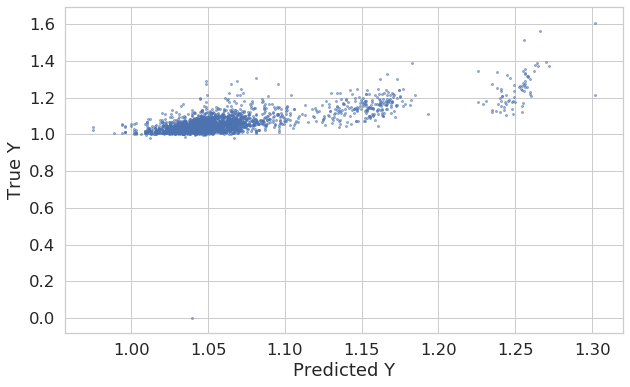

In [652]:
# Mark
# Accumulated Model of a specific delay over a period of time as defined above
# i.e. model can be used to predict any day, in theory
# X: 
#    Accumulated X of independent models by day
# Y:
#    Accumulated Y of independent models by day

score_accumulated = {}
coef_accumulated = {}
intercept_accumulated = {}
best_accumulated_delay = {}
for delay in delay_range:
    model =  LinearRegression()
    X = regularize(X_accumulated[delay])
    # if missing some time dependent features, drop those columns
    X = X.dropna(axis = 1)
    Y_confirmed = Y_confirmed_accumulated[delay]
    
    model.fit(X, Y_confirmed)
    score_accumulated[delay] = model.score(X, Y_confirmed)
    coef_accumulated[delay] = dict(zip(selected_columns, model.coef_))
    intercept_accumulated[delay] = model.intercept_
    
    
# Show accumulated model Result
best_accumulated_delay = max(score_accumulated, key=score_accumulated.get)
#best_accumulated_delay = 9
print("best_accumulated_delay:")
display(best_accumulated_delay)

#print("score:")
#display(score_accumulated[best_accumulated_delay])

#print("intercept:")
#display(intercept_accumulated[best_accumulated_delay])

#print("sorted coef:")
#display(coef_accumulated[best_accumulated_delay])
#display({k: v for k, v in sorted(coef_accumulated[best_accumulated_delay].items(), key=lambda item: item[1])})

linear_model =  LinearRegression()
X = regularize(X_accumulated[20])
# if missing some time dependent features, drop those columns
X = X.dropna(axis = 1)
Y_confirmed = Y_confirmed_accumulated[20]
    
linear_model.fit(X, Y_confirmed)
print(linear_model.score(X, Y_confirmed))
plt.figure(figsize=(10,6))
plt.scatter(linear_model.predict(X), Y_confirmed, s = 4, alpha = 0.5)
plt.xlabel("Predicted Y")
plt.ylabel("True Y");


Best delay is approximated at 20 days, much larger than a median incubation period of 5.1 days. This is possibly due to other dynamic effects which happen to show effect 20 days after the interventions.

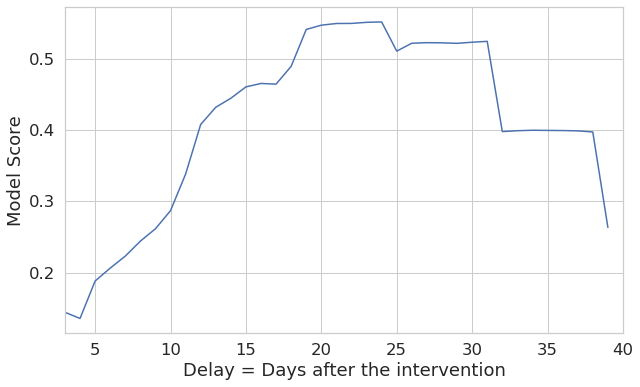

In [653]:
plt.figure(figsize=(10,6))
plt.plot(delay_range, [score_accumulated[delay] for delay in delay_range])
plt.xlabel("Delay = Days after the intervention")
plt.ylabel("Model Score")
plt.xlim(3,40);

Still, a maximum point at 8 days could explain the delay of the interventions. To evaluate the effects of all interventions, a ridge regression is conducted.

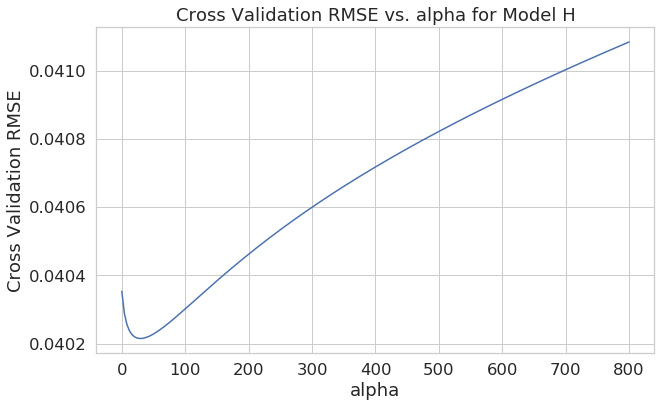

In [654]:
#best_accumulated_delay = 9

# Make a list of cross validation errors for each alpha
val_errs=list()
alphas = np.linspace(0,800,201)
for alpha in alphas:
    model, X_test, Y_test, tr_err, val_err, w= RidgeModel(X_accumulated[best_accumulated_delay], Y_confirmed_accumulated[best_accumulated_delay], alpha)
    val_errs.append(val_err)


# Plot cross validation errors for each alpha to select the best alpha
plt.figure(figsize=[10,6])
plt.plot(alphas, val_errs)
plt.xlabel('alpha')
plt.ylabel('Cross Validation RMSE')
plt.title('Cross Validation RMSE vs. alpha for Model H');

In [655]:
bset_alpha = alphas[val_errs.index(min(val_errs))]
print("Bset alpha:", bset_alpha)
model, X_test, Y_test, tr_err, val_err, w = RidgeModel(X_accumulated[best_accumulated_delay], Y_confirmed_accumulated[best_accumulated_delay], bset_alpha)
print("Training RMSE:", train_error)
print("Cross Validation RMSE:", validation_error);
w

Bset alpha: 28.0
Training RMSE: 463.6802626843498
Cross Validation RMSE: 461.39361651387054


,Weight
Static Factor,
foreign travel ban,-0.032744
#EligibleforMedicare2018_proportion,-0.013460
stay at home,-0.009329
PopMale55-592010_proportion,-0.008323
PopMale30-342010_proportion,-0.006666
restaurant dine-in,-0.006614
>50 gatherings,-0.006184
PopFmle65-742010_proportion,-0.004922
PopFmle25-292010_proportion,-0.003815


Result shows that interventons gernerally show good effects on lower the virus spreading speed. Of all the interventions, stay-at-home shows the best effect, much more effective than other interventions. Consistent as pervious, population density is still the largest contributor of virus spreading.

In [656]:
test_day_range = range(737532,737550)[0::7]

for delay in delay_range:
    Y_confirmed_accumulated[delay] = pd.DataFrame()
    #Y_deaths_accumulated[delay] = pd.DataFrame()
    X_accumulated[delay] = pd.DataFrame()
    for day in test_day_range:
        
        # add features
        data = add_static_features(data);
        
        # get day specific data generated
        data_day = add_day_specific_features(data);
        
        Y_confirmed = (data_day[column_confirmed(day)]/data_day[column_confirmed(day-nth_day)])**(1/nth_day)
        if Y_confirmed_accumulated[delay].shape[0] == 0:
            Y_confirmed_accumulated[delay] = Y_confirmed.copy()
        else:
            Y_confirmed_accumulated[delay] = Y_confirmed_accumulated[delay].append(Y_confirmed)
            
        #Y_deaths = (data_day[column_deaths(day)]/data_day[column_deaths(day-nth_day)])**(1/nth_day)
        #if Y_deaths_accumulated[delay].shape[0] == 0:
        #    Y_deaths_accumulated[delay] = Y_deaths.copy()
        #else:
        #    Y_deaths_accumulated[delay] = Y_deaths_accumulated[delay].append(Y_deaths)
            
        selected_columns = interventions_columns + static_columns + \
                           [#"days_since_first_local_case",
                            #"days_since_first_case_of_us",
                            #"days_since_first_local_case_log",
                            #"days_since_first_case_of_us_log",
                            #"days_since_first_local_case_log_arctan",
                            #"days_since_first_case_of_us_log_arctan"
                           ]# + ["days_since_first_local_case^2"] + ["first_case_confirmed"] + ["exp_days_since_first_case"] + state_columns
        
        X = data_day[selected_columns].fillna(0)
        if X_accumulated[delay].shape[0] == 0:
            X_accumulated[delay] = X.copy()
        else:
            X_accumulated[delay] = X_accumulated[delay].append(X)

        #model =  LinearRegression()
        #model.fit(X, Y_confirmed)
        #score[delay, day] = model.score(X, Y_confirmed)
        #coef[delay, day] = model.coef_
        #intercept[delay, day] = model.intercept_

-1.3803777073588948

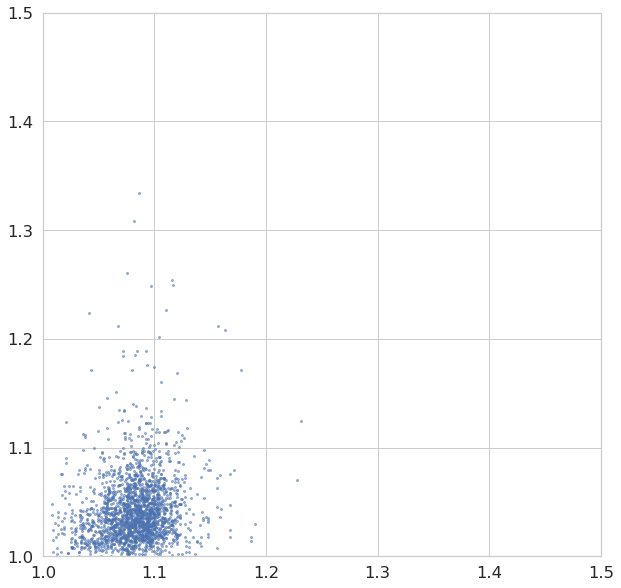

In [648]:
X = X_accumulated[best_accumulated_delay]
# if missing some time dependent features, drop those columns
X = X.dropna(axis = 1)
Y_confirmed = Y_confirmed_accumulated[best_accumulated_delay]
plt.figure(figsize=(10,10))
plt.scatter(linear_model.predict(X), Y_confirmed, s = 4, alpha = 0.5)
plt.xlim(1,1.5)
plt.ylim(1,1.5)
linear_model.score(X, Y_confirmed)
